# STAT5620 Data Analysis : CREDIT CARD DEFAULTS PREDICTION

Developed by:<br>
Pramir KC : pr260461@dal.ca <br>
Simranjeet Kaur Gahir : simranjeet.gahir@dal.ca

## Project Objective

Credit card default happens when credit card holders become severely delinquent on their credit card payments. This has been increasing with the increase in credit card lending by banks. Thus, leads people to overestimate their spending capacity which ultmately results in credit card defaults. The main objective of this project is:<br>
- Predict whether the customer will default or not based on classification model
- Identify key explanatory variables leading to default

## Data Collection

This dataset has been taken from : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

This dataset contains six months (Apr-Sep 2005)  data of credit card customers of a bank in Taiwan. It contains 30000 observations in total with 24 variables. Since it's a binary classification problem so it has binary response variable.

The description of the variables as follows:

ID: ID of each client<br>
LIMIT_BAL: Amount of given credit in NT dollars<br>
SEX: Gender (1=male, 2=female)<br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE: Marital status (1=married, 2=single, 3=others)<br>
AGE: Age in years<br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
PAY_2: Repayment status in August, 2005<br>
PAY_3: Repayment status in July, 2005<br>
PAY_4: Repayment status in June, 2005 <br>
PAY_5: Repayment status in May, 2005 <br>
PAY_6: Repayment status in April, 2005<br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)<br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)<br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)<br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)<br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)<br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)<br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)<br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)<br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)<br>
default.payment.next.month: Default payment (1=yes, 0=no)

### Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

### Function Definitions Used in the code

In [2]:
#Plot distribution of data among categories to detect outliers
def distribution(variable,df):
    s = df.groupby([variable,'default_payment']).size().unstack(fill_value=0)
    s['total'] = s[1]+s[0]  
    ax =s[['total']].plot(kind='bar', color="royalblue", legend=None)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=20)
    plt.xlabel(variable, size=15, fontweight='bold')
    ax.set_ylabel("Total amount",size = 15, fontweight='bold')

#Plot all performance metrics for a model
def performance_metrics(a,b):
    confusion = metrics.confusion_matrix(a,b)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    confusion = np.array([[ TP, FP],
                          [ FN, TN]])
    print("Confusion Matrix : ",'\n',confusion) #Confusion Matrix
    print("Accuracy : ", round((TP+TN) / float(TP+TN+FP+FN),3)) #Accuracy
    #print("Specificity : ", round(TN / float(TN+FP),3)) #Specificity
    #print("Precision : ", round(TP / float(TP+FP),3)) #Precision
    print("Recall : ", round(TP / float(TP+FN),3)) #Recall
    print("Flagged percentage :", round(b.sum()/float(TP+TN+FP+FN),3))
    return()

### Import Dataset

In [3]:
df = pd.read_excel("Original dataset.xls")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.shape

(30000, 25)

In [4]:
#Create backup of the original dataset
df_bkp = df.copy()

### Find Missing Values 

In [5]:
# Find the count of the missing values
print('Missing Values Count:')
for i in df.columns:
    if df[i].isnull().sum()>0: 
        print(i,':', str(df[i].isnull().sum()))

Missing Values Count:


This dataset contains no missing values

### Data Cleaning

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
# Combining the observations of Education variables with unknown status
df['EDUCATION'].mask(df['EDUCATION'] == 0, 4, inplace=True)
df['EDUCATION'].mask(df['EDUCATION'] == 5, 4, inplace=True)
df['EDUCATION'].mask(df['EDUCATION'] == 6, 4, inplace=True)

In [8]:
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [9]:
# Combining the observations of Marriage variables with unknown status
df['MARRIAGE'].unique()
df['MARRIAGE'].mask(df['MARRIAGE'] == 0, 3, inplace=True)

In [10]:
df['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

### Checking Null Values

In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

This dataset contains no Null values

In [12]:
df.rename({'default payment next month': 'default_payment'}, axis=1, inplace=True)
df.rename({'PAY_0': 'PAY_1'}, axis=1, inplace=True)

### Response Variable

In [13]:
#Derive target column
df['default_payment'] = np.where(df['default_payment'] == 1,'yes','no')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,yes
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,no


In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,yes
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,no


In [15]:
df.dtypes

ID                  int64
LIMIT_BAL           int64
SEX                 int64
EDUCATION           int64
MARRIAGE            int64
AGE                 int64
PAY_1               int64
PAY_2               int64
PAY_3               int64
PAY_4               int64
PAY_5               int64
PAY_6               int64
BILL_AMT1           int64
BILL_AMT2           int64
BILL_AMT3           int64
BILL_AMT4           int64
BILL_AMT5           int64
BILL_AMT6           int64
PAY_AMT1            int64
PAY_AMT2            int64
PAY_AMT3            int64
PAY_AMT4            int64
PAY_AMT5            int64
PAY_AMT6            int64
default_payment    object
dtype: object

In [16]:
df['default_payment'] = df['default_payment'].replace(['no'],0)
df['default_payment'] = df['default_payment'].replace(['yes'],1)

## Exploratory Data Analysis (EDA)

#### Relationship of demographic variables with Response Variable

#### Imbalanced Classification

0    23364
1     6636
Name: default_payment, dtype: int64


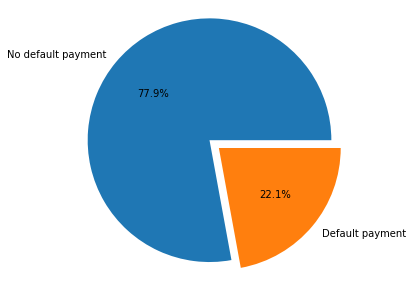

In [17]:
print(df.default_payment.value_counts())

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No default payment','Default payment'
explode = (0.1,0) 
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(df.default_payment.value_counts(), explode=explode, labels=labels, startangle=0, autopct='%1.1f%%')
ax1.axis('equal')  

plt.show()

The above shows that we have unbalanced dataset with only 22% as non default customers.

default_payment         0         1
SEX                                
1                0.758328  0.241672
2                0.792237  0.207763


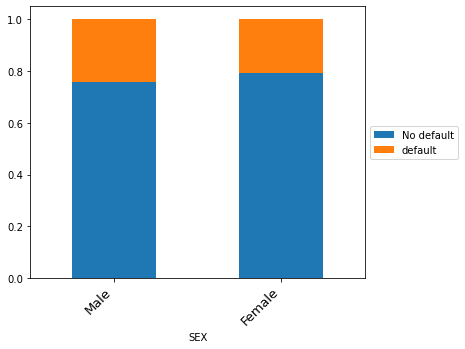

In [18]:
a = pd.crosstab(df['SEX'], df['default_payment'], normalize='index')

print(a)
ct = pd.crosstab(df.SEX, df.default_payment,normalize='index')
bars = ('Male', 'Female')
y_pos = np.arange(len(bars))
ct.plot.bar(stacked=True, figsize=(6,5))
plt.xticks(y_pos, bars, color='Black', rotation=45, fontsize='13', horizontalalignment='right')
plt.legend(title='y')
my_labels=("No default","default")
plt.legend(labels=my_labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Males(24%) have engaged in slightly more default cases as compared to females(20%)

default_payment         0         1
EDUCATION                          
1                0.807652  0.192348
2                0.762651  0.237349
3                0.748424  0.251576
4                0.929487  0.070513


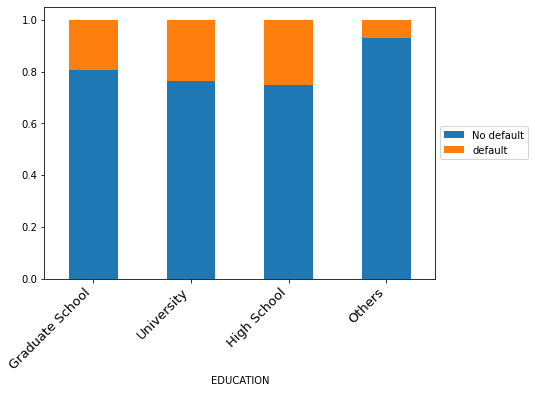

In [19]:
a = pd.crosstab(df['EDUCATION'], df['default_payment'], normalize='index')

print(a)
ct = pd.crosstab(df.EDUCATION, df.default_payment,normalize='index')
ct.plot.bar(stacked=True, figsize=(7,5))
bars = ( 'Graduate School','University','High School','Others')
y_pos = np.arange(len(bars))
plt.xticks(y_pos ,bars, color='Black', rotation=45, fontsize='13', horizontalalignment='right')
plt.legend(title='y')
my_labels=("No default","default")
plt.legend(labels=my_labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Credit Card defaulters who have only High School degree or University degree have been observed to default comparatively more than Graduate degree holders

default_payment         0         1
MARRIAGE                           
1                0.765283  0.234717
2                0.790717  0.209283
3                0.763926  0.236074


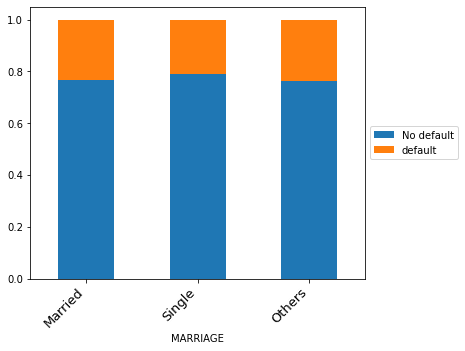

In [20]:
a = pd.crosstab(df['MARRIAGE'], df['default_payment'], normalize='index')

print(a)
ct = pd.crosstab(df.MARRIAGE, df.default_payment,normalize='index')

ct.plot.bar(stacked=True,figsize=(6,5))
bars = ( 'Married','Single','Others')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, color='Black', rotation=45, fontsize='13', horizontalalignment='right')
plt.legend(title='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
my_labels=("No default","default")
plt.legend(labels=my_labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Married people(23%) have been observed in more default cases compared to unmarried(20%)

#### Relationship of demographic variables with Credit limit balance

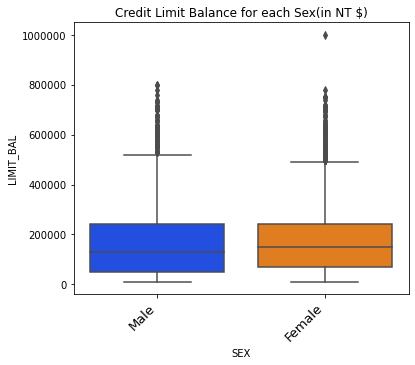

In [21]:
plt.figure(figsize=(6,5))
plt.title('Credit Limit Balance for each Sex(in NT $)')
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x= df['SEX'], y=df['LIMIT_BAL'], data=df, palette='bright')
bars = ('Male', 'Female')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, color='Black', rotation=45, fontsize='13', horizontalalignment='right')
plt.show();

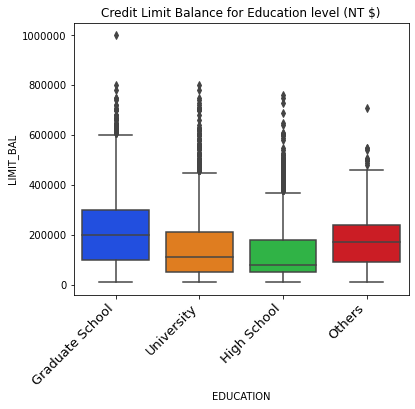

In [22]:
plt.figure(figsize=(6,5))
plt.title('Credit Limit Balance for Education level (NT $)')
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x= df['EDUCATION'], y=df['LIMIT_BAL'], data=df, palette='bright')
bars = ('Graduate School','University','High School','Others')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, color='Black', rotation=45, fontsize='13', horizontalalignment='right')
plt.show();

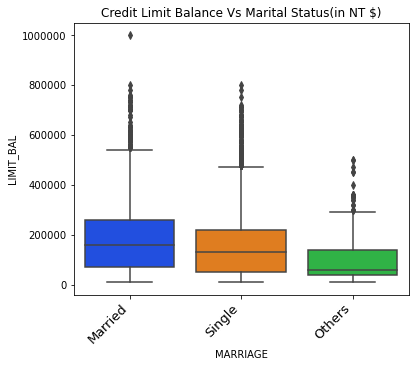

In [23]:
plt.figure(figsize=(6,5))
plt.title('Credit Limit Balance Vs Marital Status(in NT $)')
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x= df['MARRIAGE'], y=df['LIMIT_BAL'], data=df, palette='bright')
bars = ('Married', 'Single','Others')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, color='Black', rotation=45, fontsize='13', horizontalalignment='right')
plt.show();

In [24]:
df['Age_bin'] = pd.cut(df['AGE'],[20, 30, 40, 50, 60, 80])
print(df['Age_bin'].value_counts())

(20, 30]    11013
(30, 40]    10713
(40, 50]     6005
(50, 60]     1997
(60, 80]      272
Name: Age_bin, dtype: int64


In [25]:
df['default_payment'].groupby(df['Age_bin']).value_counts(normalize = True)

Age_bin   default_payment
(20, 30]  0                  0.775629
          1                  0.224371
(30, 40]  0                  0.795669
          1                  0.204331
(40, 50]  0                  0.767027
          1                  0.232973
(50, 60]  0                  0.747621
          1                  0.252379
(60, 80]  0                  0.731618
          1                  0.268382
Name: default_payment, dtype: float64

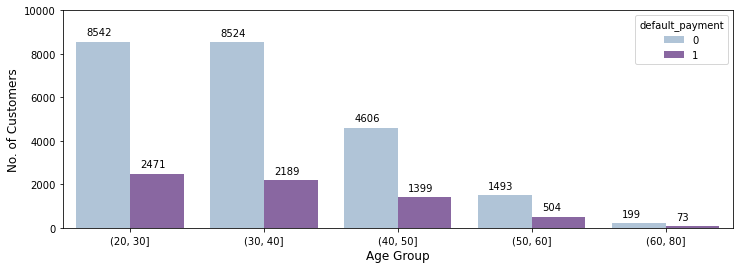

In [26]:
plt.figure(figsize=(12,4))

df['Age_bin'] = df['Age_bin'].astype('str')
Age_bin_order = ['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
# AgeBin_order = ['(20, 30]','(30, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'Age_bin', hue="default_payment", palette = 'BuPu',order=Age_bin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("No. of Customers", fontsize= 12)
plt.ylim(0,10000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

Majority of the credit card owners as well as defaulters fall in the age group of 20 to 40. Hence, younger people are more likely to default than the middle-aged and old generation.

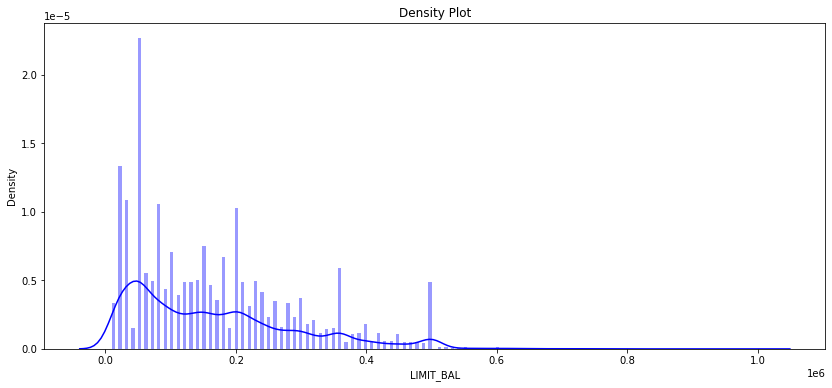

In [27]:
plt.figure(figsize = (14,6))
plt.title('Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64


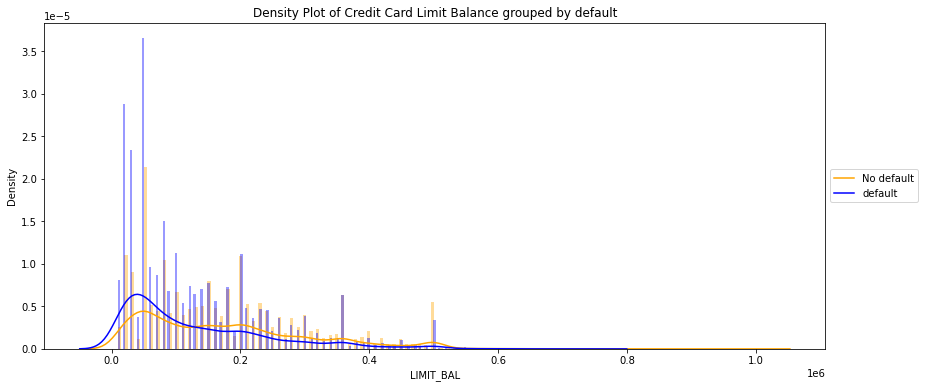

In [28]:
class_0 = df.loc[df['default_payment'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default_payment'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Density Plot of Credit Card Limit Balance grouped by default')
sns.set_color_codes("pastel")
sns.distplot(class_0,kde=True,bins=200, color="orange")
sns.distplot(class_1,kde=True,bins=200, color="blue")
print(df['LIMIT_BAL'].value_counts().head(5))
my_labels=("No default","default")
plt.legend(labels=my_labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Largest number of credit card holders have a credit limit of 50,000, 20,000 and 30,000 NT dollars. Most defaulters have a credit limit in the range of 0-100000 NT dollars as the probability density for defaults is more than non-defaults in this segment.

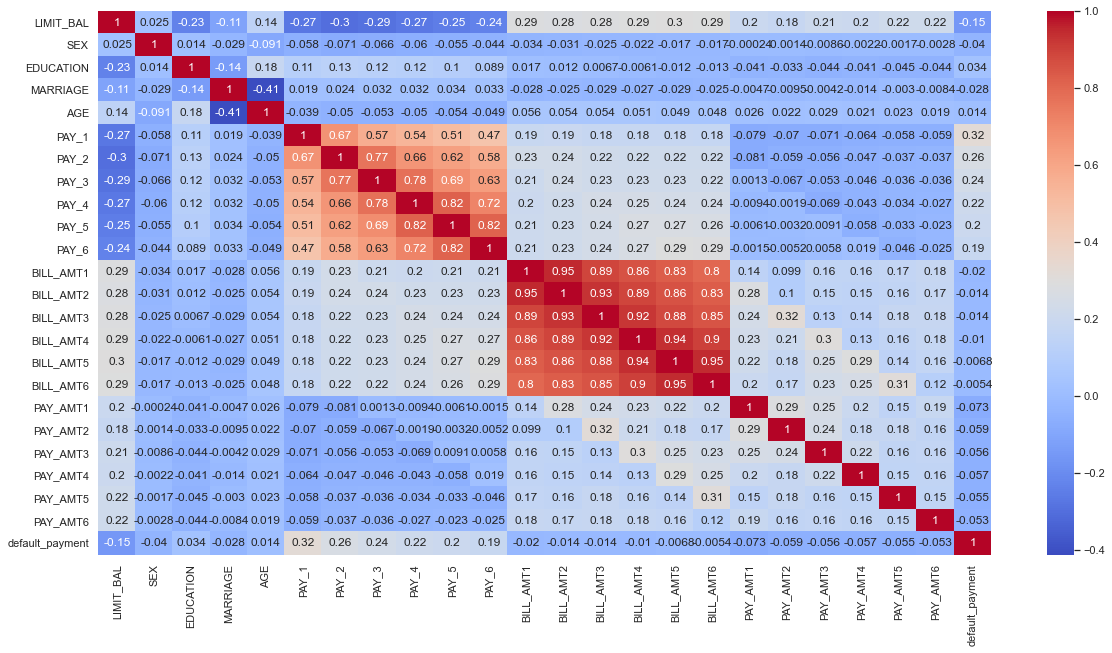

In [29]:
sns.set(rc={'figure.figsize':(20,10)})    
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap= 'coolwarm');

In [5]:
#Creating copy of dataset for random forest model to be used later
df_rf = df.copy() 

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [32]:
df.shape

(30000, 26)

### Data Preparation for Logistic Regression

#### Binning of Continuous Variables

In [33]:
#derived metrics - BINNING
df['Age_bin'] = pd.cut(df['AGE'],[20, 30, 40, 50, 60, 80])
df["LIMIT_BAL_bin"]=pd.cut(df['LIMIT_BAL'],range(10000,1010000,10000), labels=range(10000,1000000,10000))
df["BILL_AMT1_bin"]=pd.cut(df['BILL_AMT1'],range(-200000,1000000,10000), labels=range(-190000,1000000,10000))
df["BILL_AMT2_bin"]=pd.cut(df['BILL_AMT2'],range(-70000,1000000,10000), labels=range(-60000,1000000,10000))
df["BILL_AMT3_bin"]=pd.cut(df['BILL_AMT3'],range(-200000,2000000,10000), labels=range(-190000,2000000,10000))
df["BILL_AMT4_bin"]=pd.cut(df['BILL_AMT4'],range(-200000,1000000,10000), labels=range(-190000,1000000,10000))
df["BILL_AMT5_bin"]=pd.cut(df['BILL_AMT5'],range(-90000,1000000,10000), labels=range(-80000,1000000,10000))
df["BILL_AMT6_bin"]=pd.cut(df['BILL_AMT6'],range(-400000,1000000,100000), labels=range(-300000,1000000,100000))

In [34]:
df["PAY_AMT1_bin"]=pd.cut(df['PAY_AMT1'],range(-100000,1000000,100000), labels=range(0,1000000,100000))
df["PAY_AMT2_bin"]=pd.cut(df['PAY_AMT2'],range(-100000,1700000,100000), labels=range(0,1700000,100000))
df["PAY_AMT3_bin"]=pd.cut(df['PAY_AMT3'],range(-100000,900000,100000), labels=range(0,900000,100000))
df["PAY_AMT4_bin"]=pd.cut(df['PAY_AMT4'],range(-100000,700000,100000), labels=range(0,700000,100000))
df["PAY_AMT5_bin"]=pd.cut(df['PAY_AMT5'],range(-100000,500000,100000), labels=range(0,500000,100000))
df["PAY_AMT6_bin"]=pd.cut(df['PAY_AMT6'],range(-100000,600000,100000), labels=range(0,600000,100000))

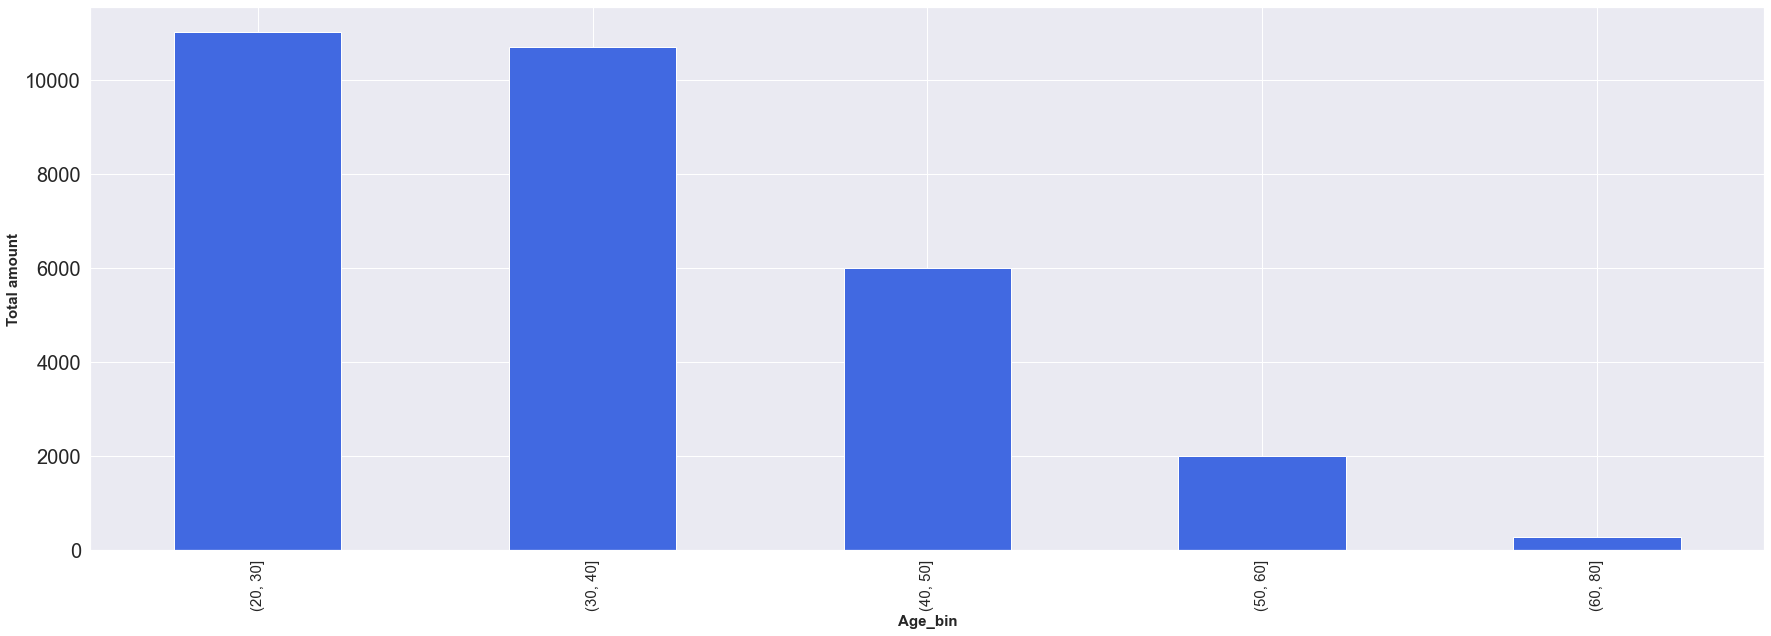

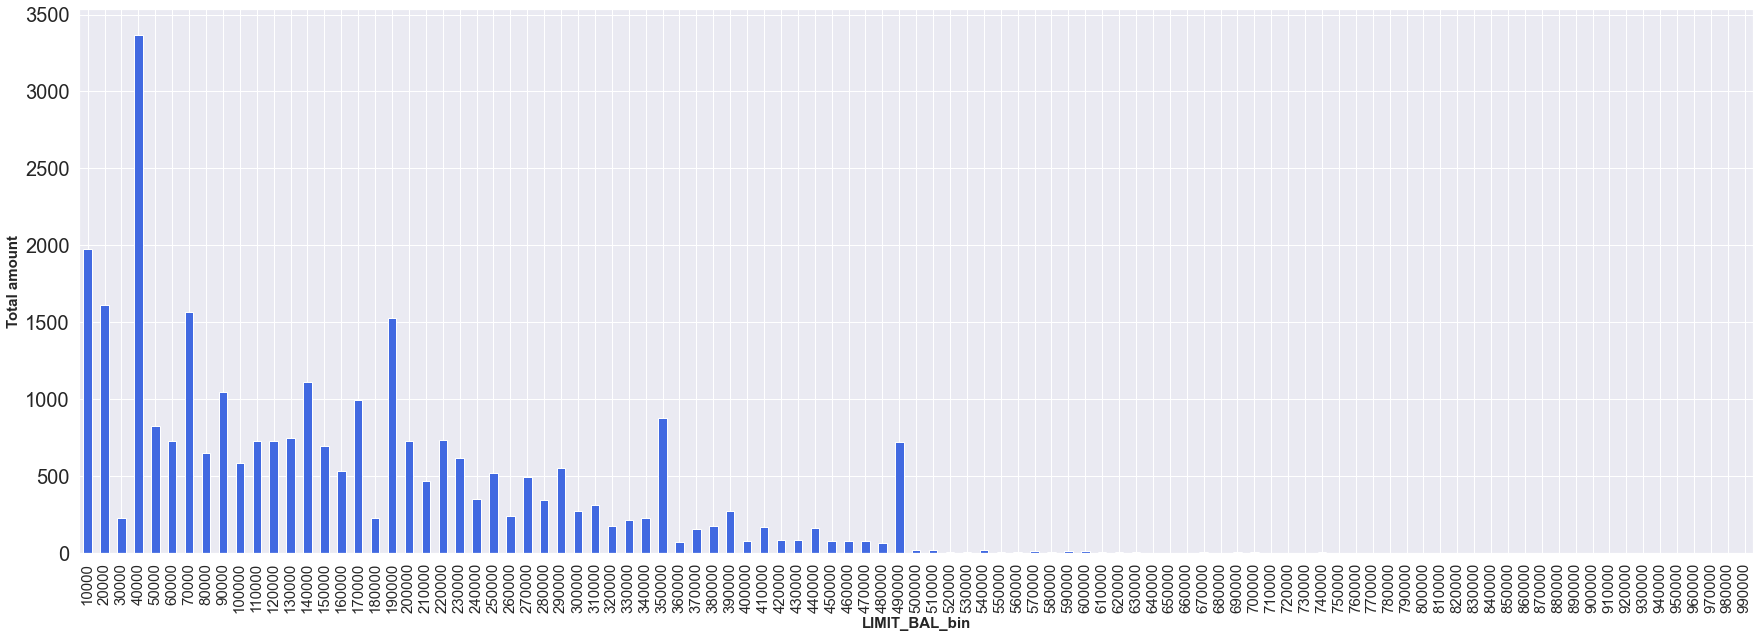

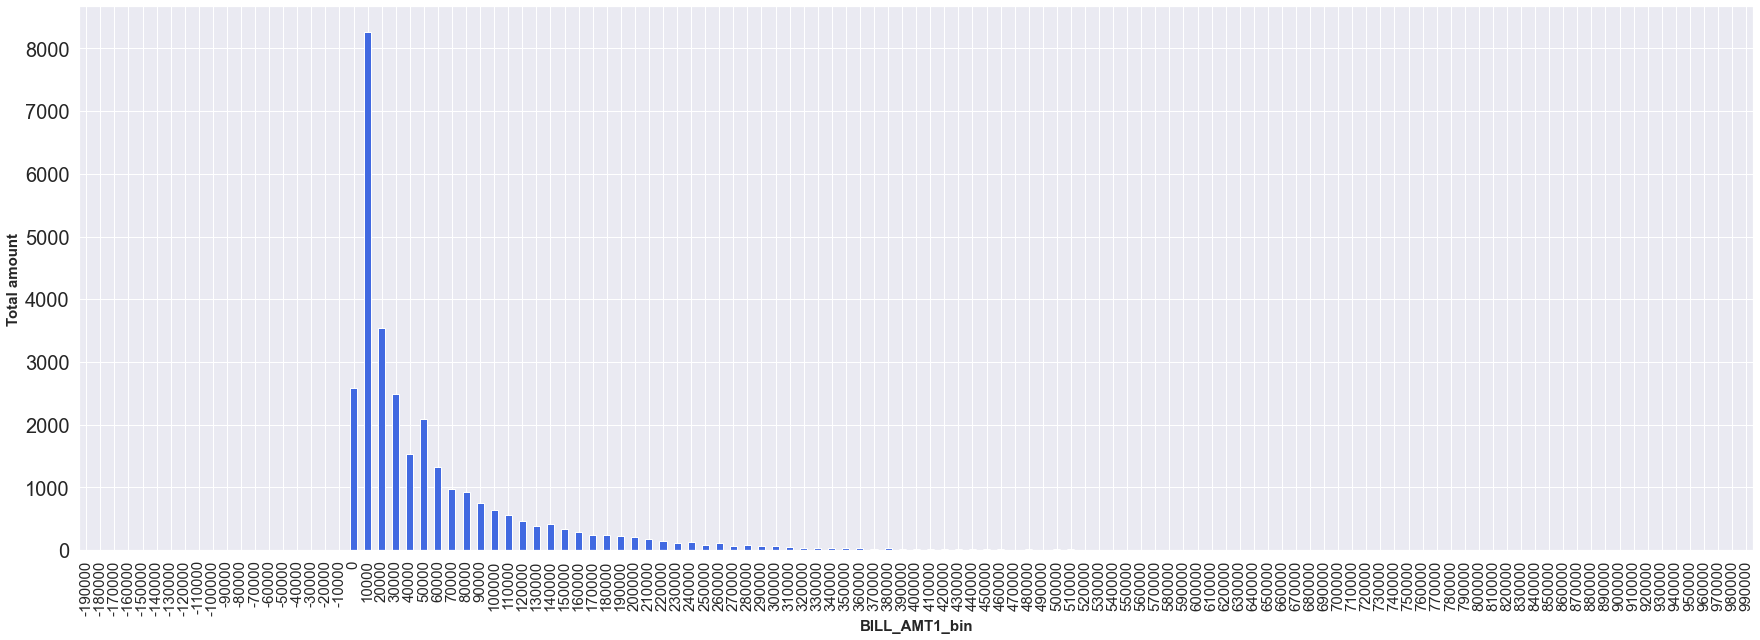

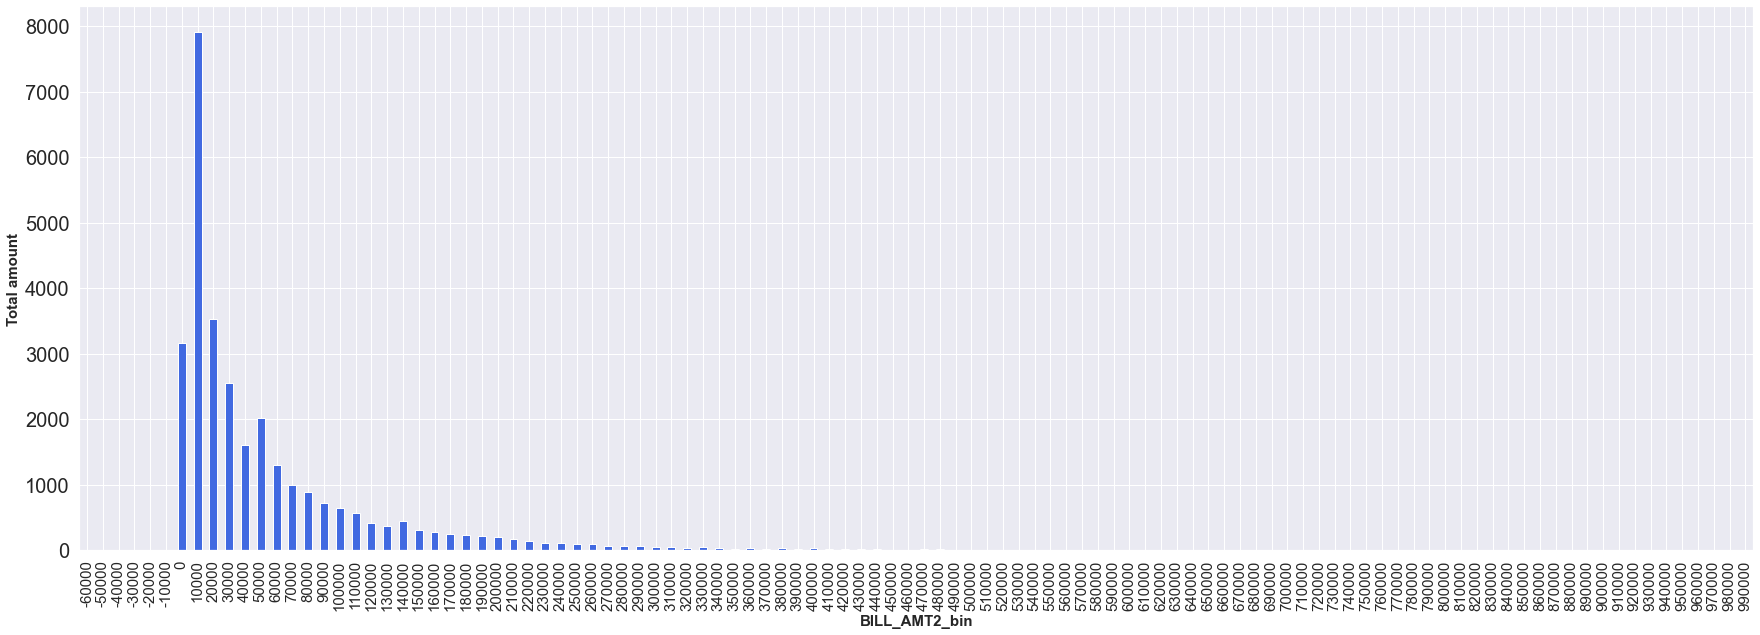

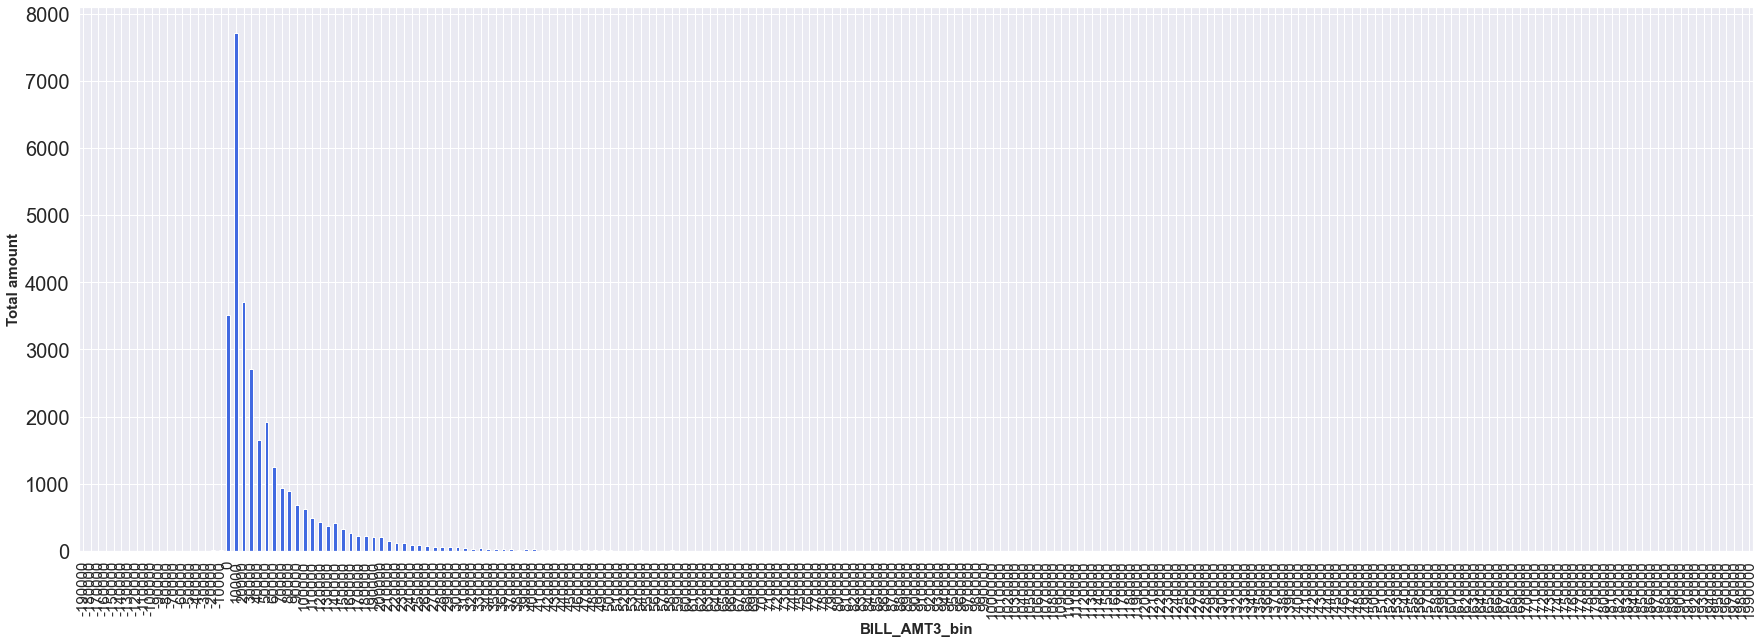

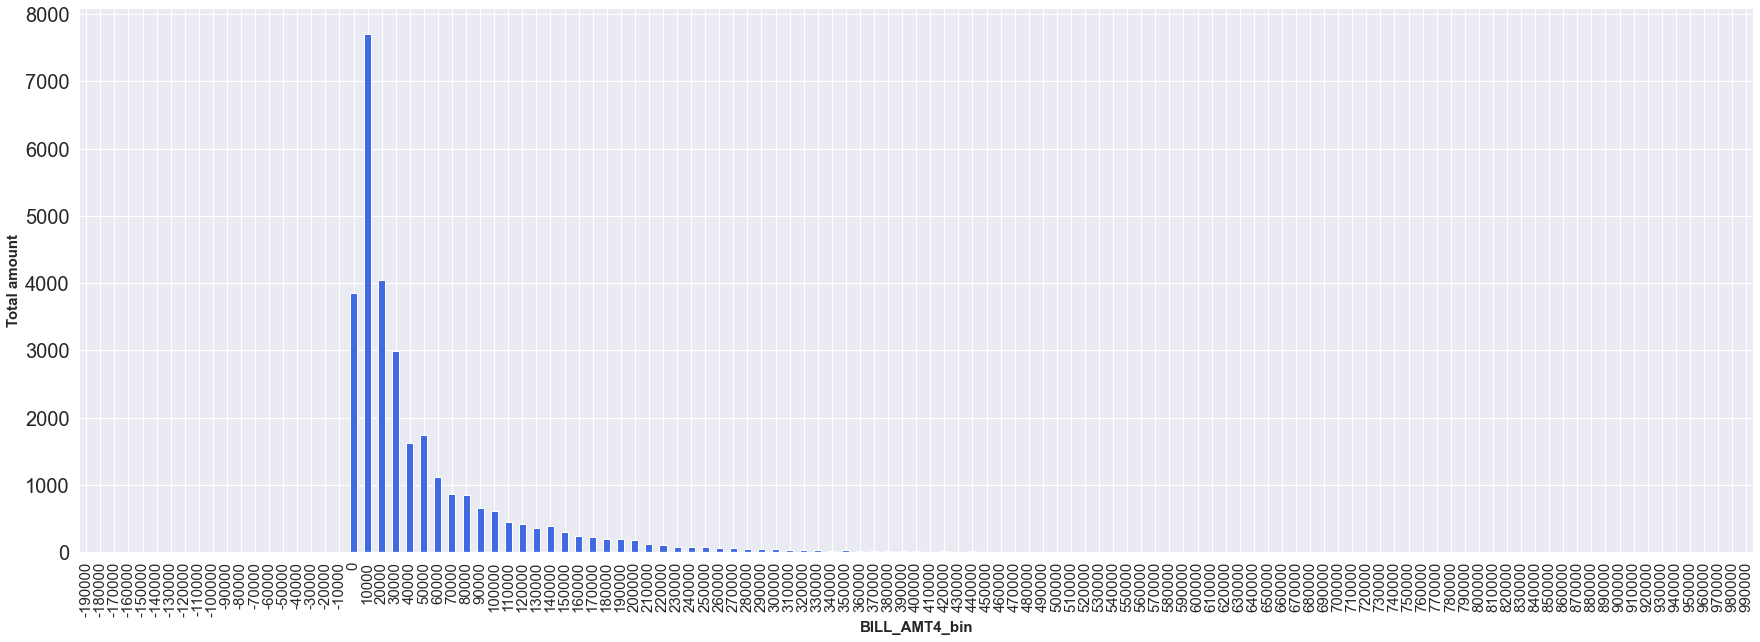

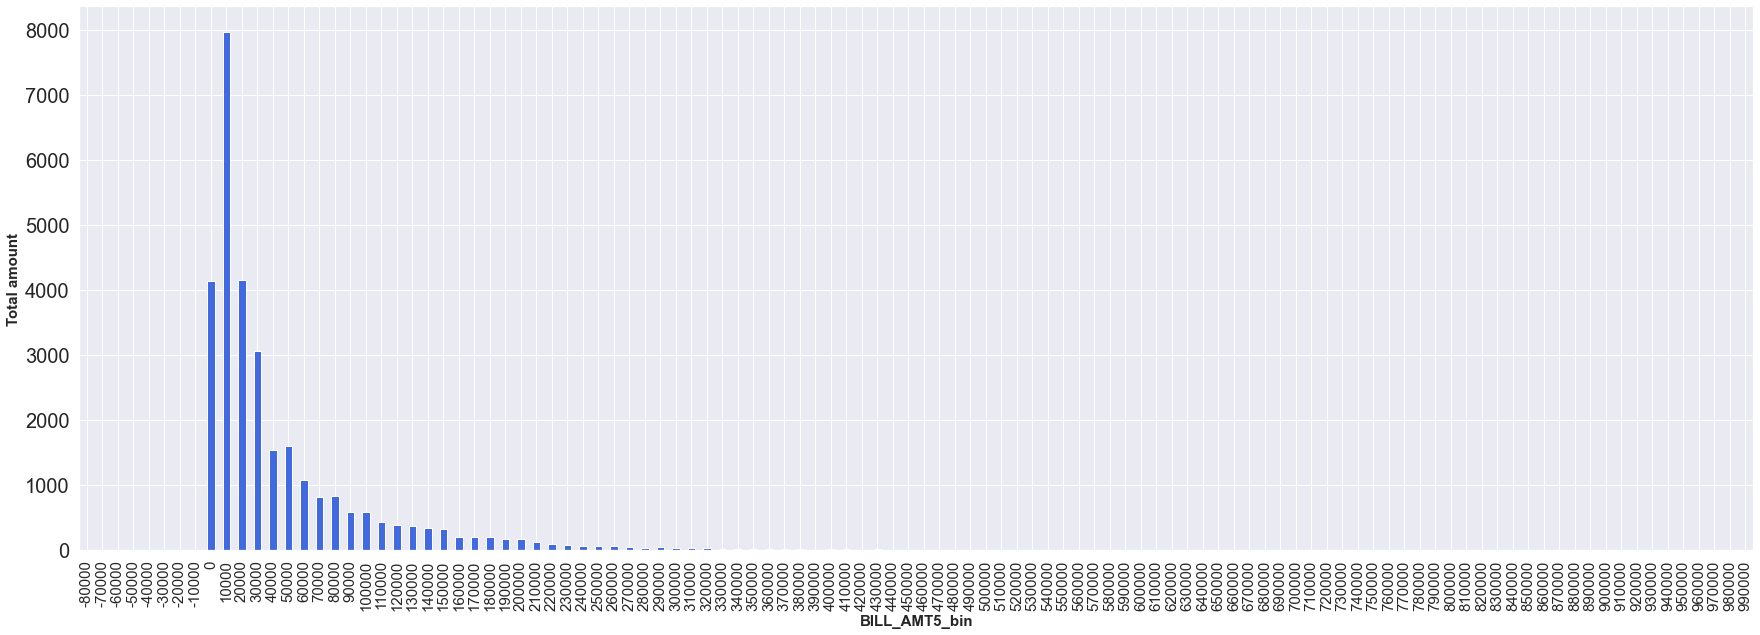

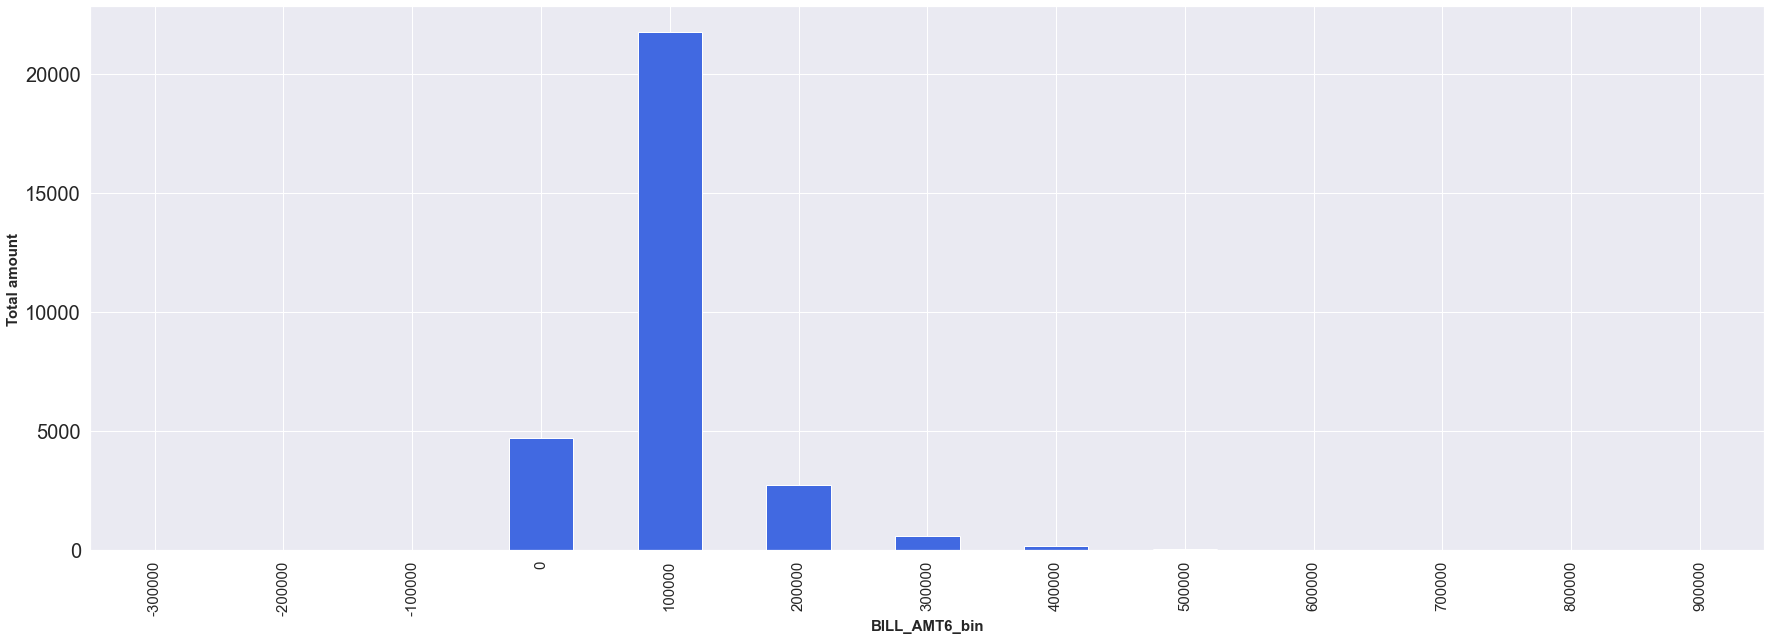

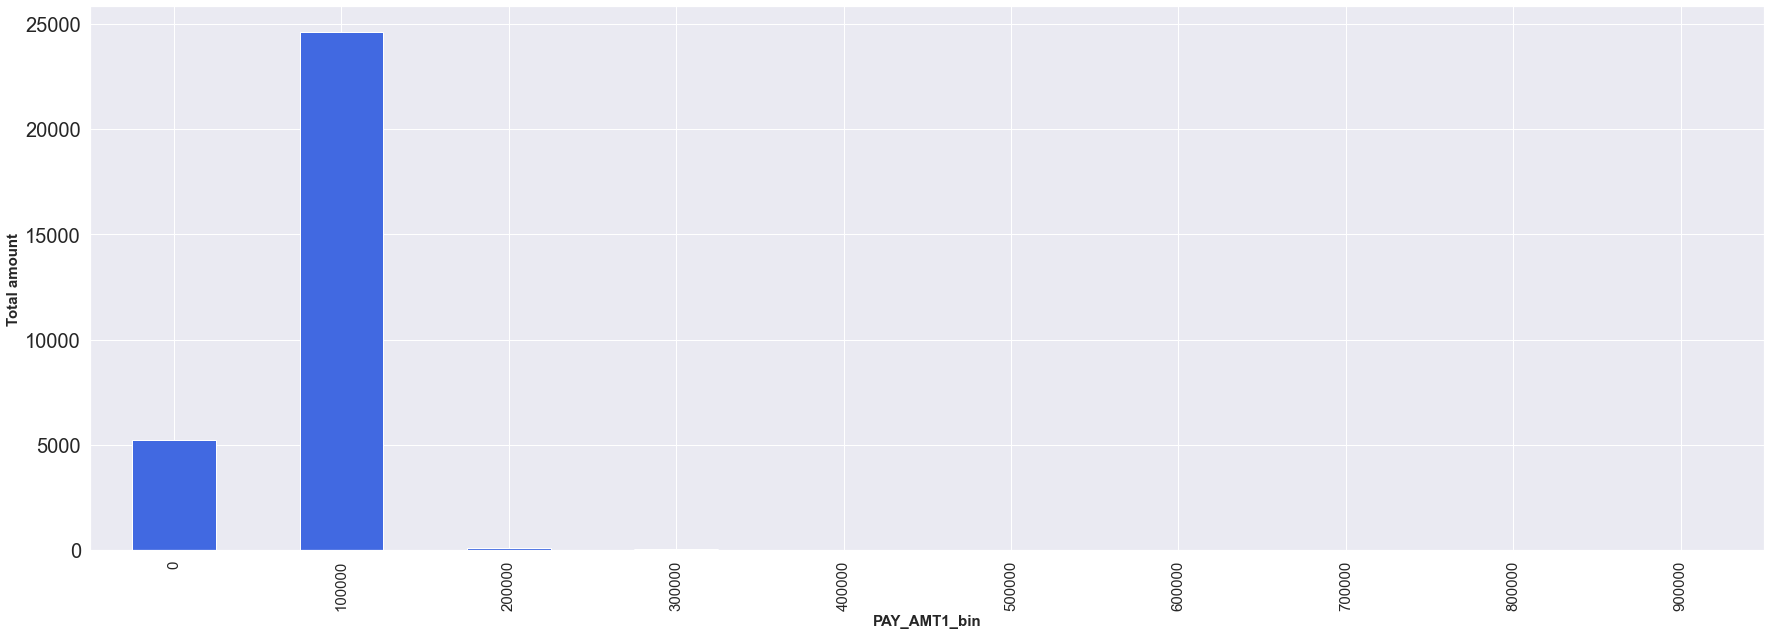

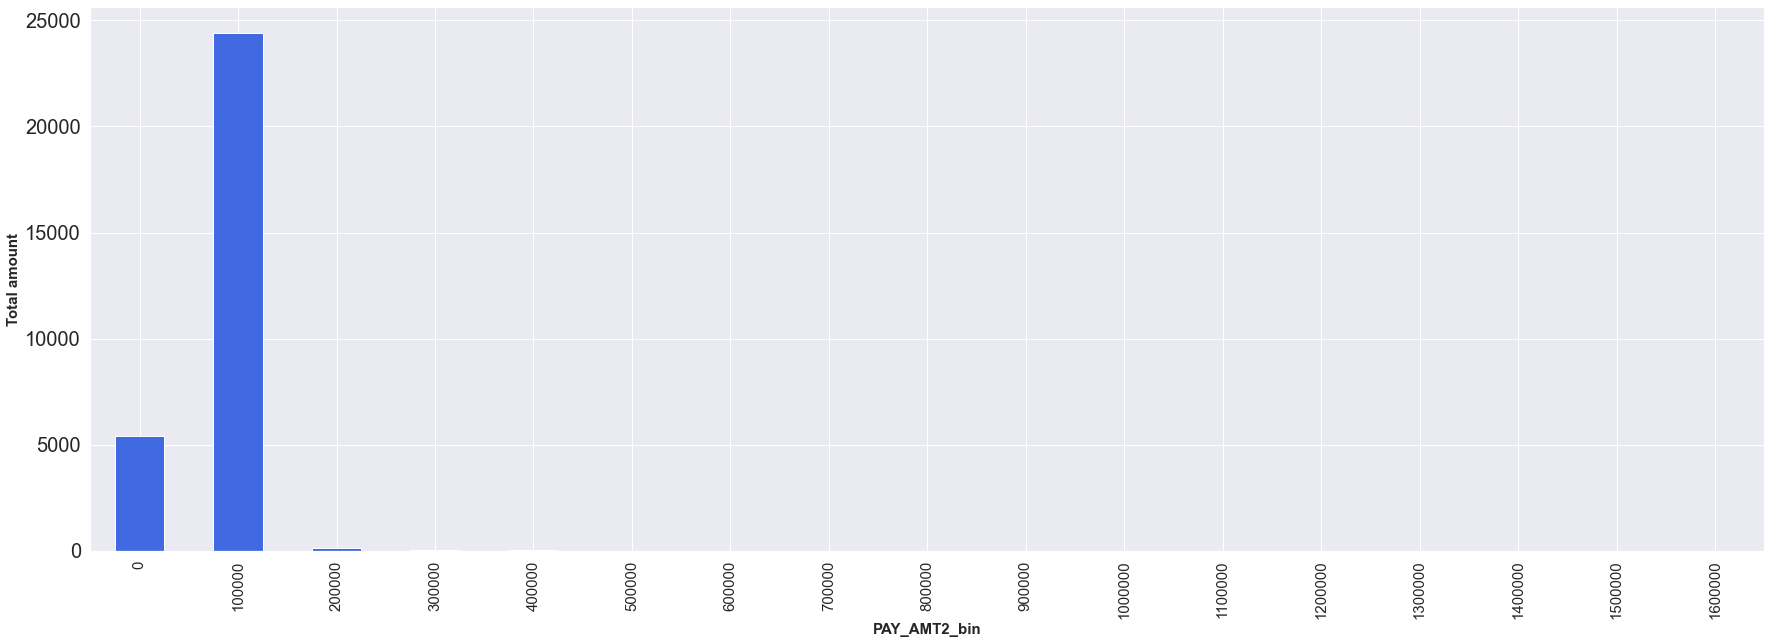

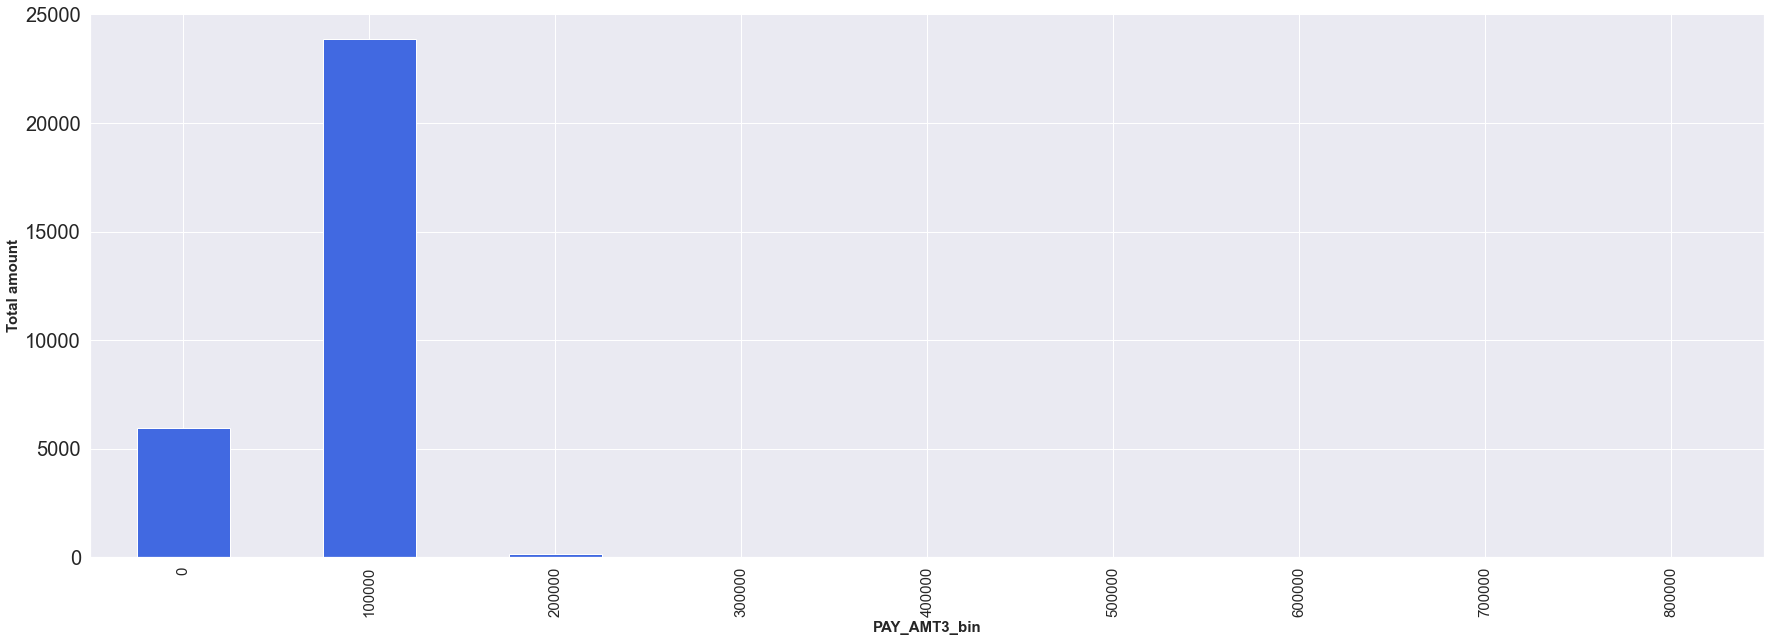

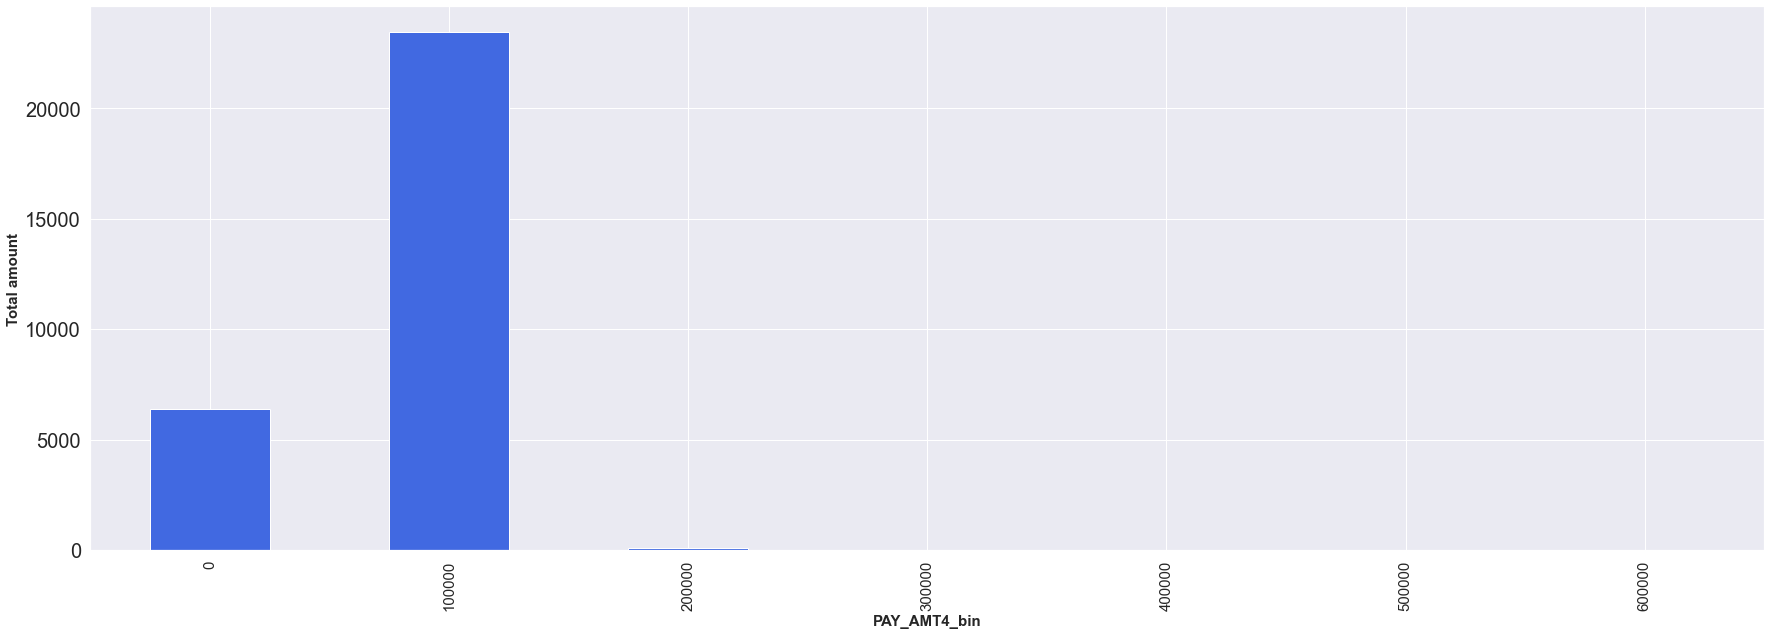

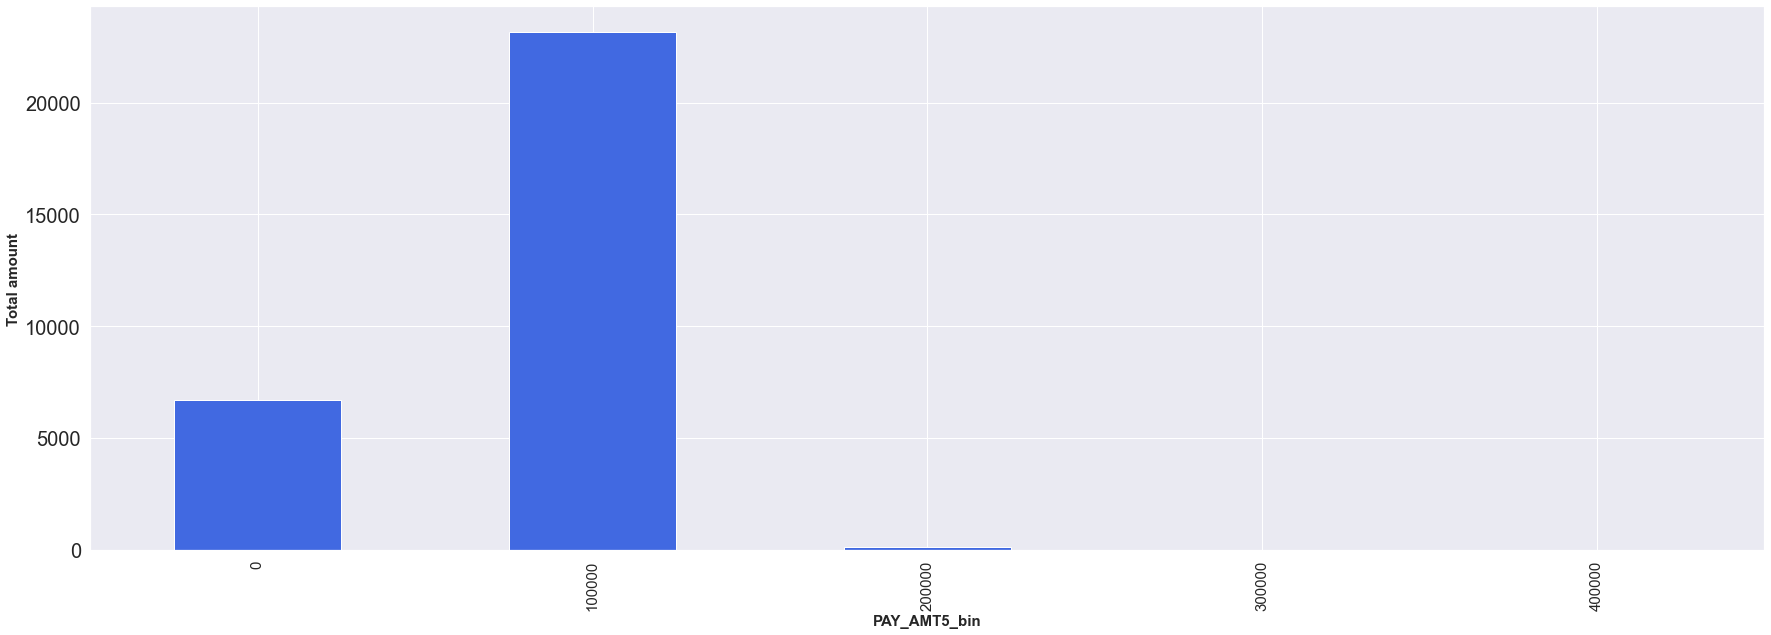

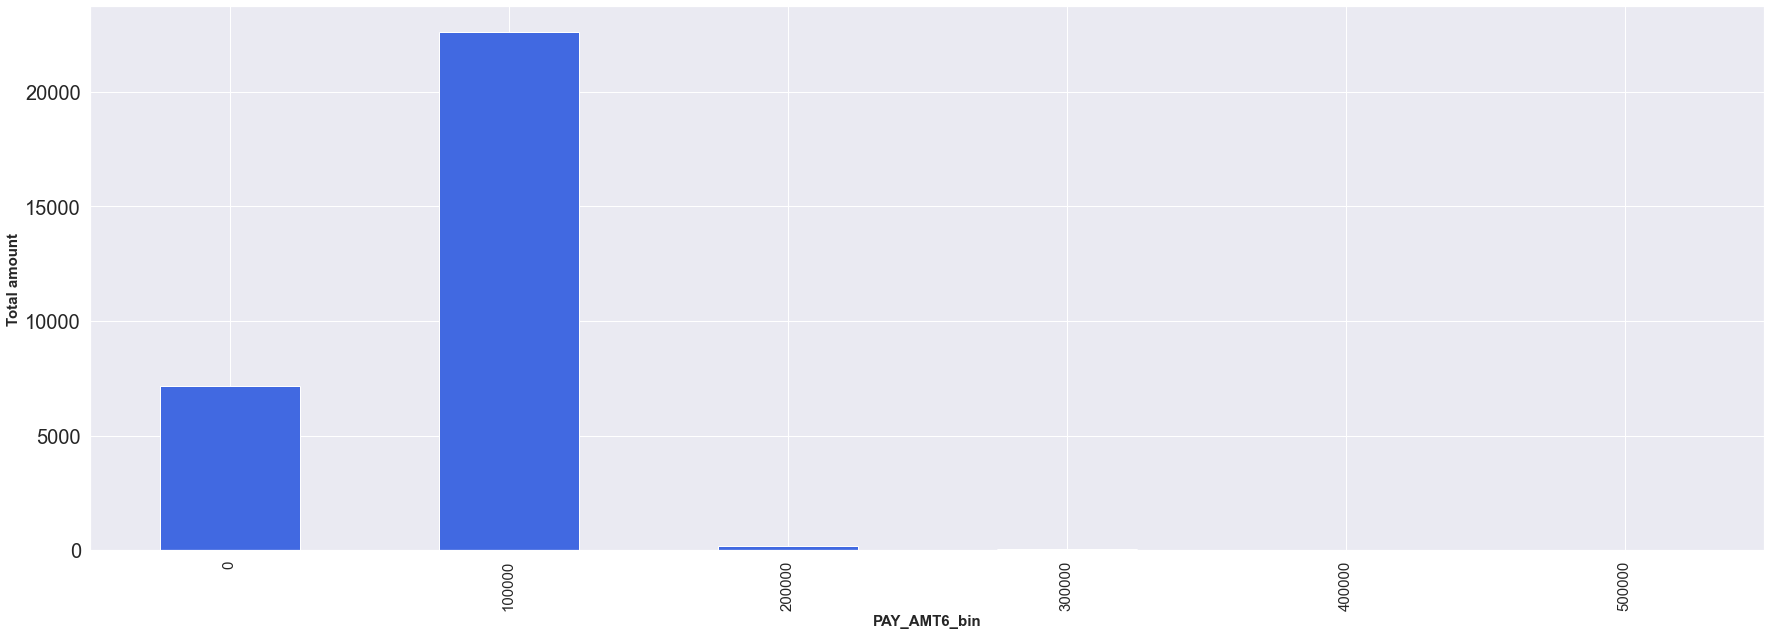

In [35]:
# Visualising Bins
for variable in df.columns:
    if "bin" in variable:
        distribution(variable,df)
        plt.gcf().set_size_inches(30, 10)

#### Removed Outliers

In [36]:
# Remove Outliers
df = df[(df['LIMIT_BAL_bin']<=500000)]
df = df[(df['BILL_AMT1_bin']>=0) & (df['BILL_AMT1_bin']<=360000)]
df = df[(df['BILL_AMT2_bin']>=0) & (df['BILL_AMT2_bin']<=400000)]
df = df[(df['BILL_AMT3_bin']>=0) & (df['BILL_AMT3_bin']<=500000)]
df = df[(df['BILL_AMT4_bin']>=0) & (df['BILL_AMT4_bin']<=300000)]
df = df[(df['BILL_AMT5_bin']>=0) & (df['BILL_AMT5_bin']<=350000)]
df = df[(df['BILL_AMT6_bin']>=0) & (df['BILL_AMT6_bin']<=400000)]

df = df[(df['PAY_AMT1_bin']>=0) & (df['PAY_AMT1_bin']<=100000)]
df = df[(df['PAY_AMT2_bin']>=0) & (df['PAY_AMT2_bin']<=100000)]
df = df[(df['PAY_AMT3_bin']>=0) & (df['PAY_AMT3_bin']<=100000)]
df = df[(df['PAY_AMT4_bin']>=0) & (df['PAY_AMT4_bin']<=100000)]
df = df[(df['PAY_AMT5_bin']>=0) & (df['PAY_AMT5_bin']<=100000)]
df = df[(df['PAY_AMT6_bin']>=0) & (df['PAY_AMT6_bin']<=100000)]

#### Rebinning to distribute the data uniformly

In [37]:
#derived metrics - REBINNING
df['Age_bin'] = pd.cut(df['AGE'],[20, 30, 40, 50, 60, 80])
df["LIMIT_BAL_bin"]=pd.cut(df['LIMIT_BAL'],range(10000,510000,10000), labels=range(10000,500000,10000))
df["BILL_AMT1_bin"]=pd.cut(df['BILL_AMT1'],range(-20000,380000,20000), labels=range(0,380000,20000))
df["BILL_AMT2_bin"]=pd.cut(df['BILL_AMT2'],range(-20000,420000,20000), labels=range(0,420000,20000))
df["BILL_AMT3_bin"]=pd.cut(df['BILL_AMT3'],range(-20000,520000,20000), labels=range(0,520000,20000))
df["BILL_AMT4_bin"]=pd.cut(df['BILL_AMT4'],range(-20000,320000,20000), labels=range(0,320000,20000))
df["BILL_AMT5_bin"]=pd.cut(df['BILL_AMT5'],range(-20000,360000,20000), labels=range(0,360000,20000))
df["BILL_AMT6_bin"]=pd.cut(df['BILL_AMT6'],range(-20000,420000,20000), labels=range(0,420000,20000))

In [38]:
df["PAY_AMT1_bin"]=pd.cut(df['PAY_AMT1'],range(-3000,33000,3000), labels=range(0,33000,3000))
df["PAY_AMT2_bin"]=pd.cut(df['PAY_AMT2'],range(-3000,33000,3000), labels=range(0,33000,3000))
df["PAY_AMT3_bin"]=pd.cut(df['PAY_AMT3'],range(-3000,33000,3000), labels=range(0,33000,3000))
df["PAY_AMT4_bin"]=pd.cut(df['PAY_AMT4'],range(-3000,33000,3000), labels=range(0,33000,3000))
df["PAY_AMT5_bin"]=pd.cut(df['PAY_AMT5'],range(-3000,33000,3000), labels=range(0,33000,3000))
df["PAY_AMT6_bin"]=pd.cut(df['PAY_AMT6'],range(-3000,33000,3000), labels=range(0,33000,3000))

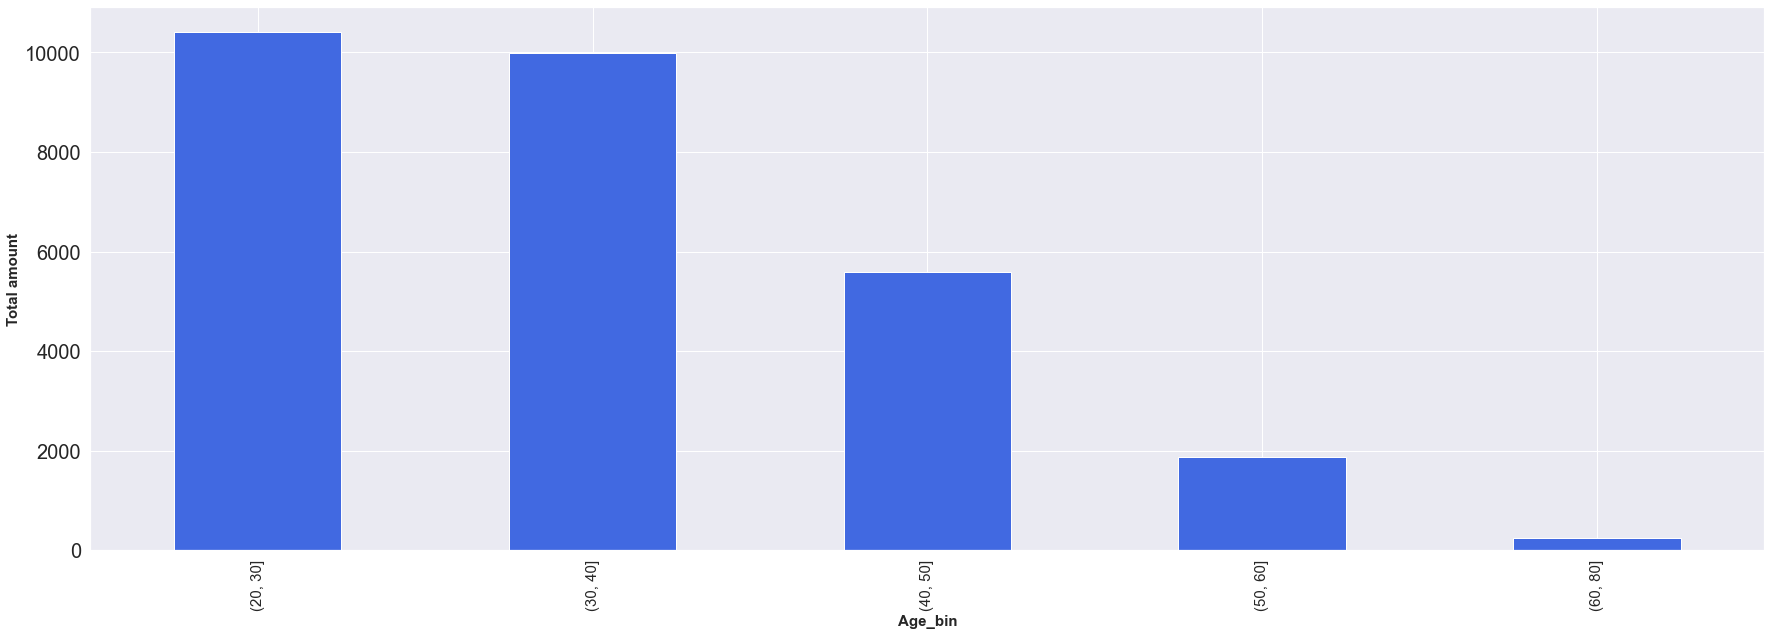

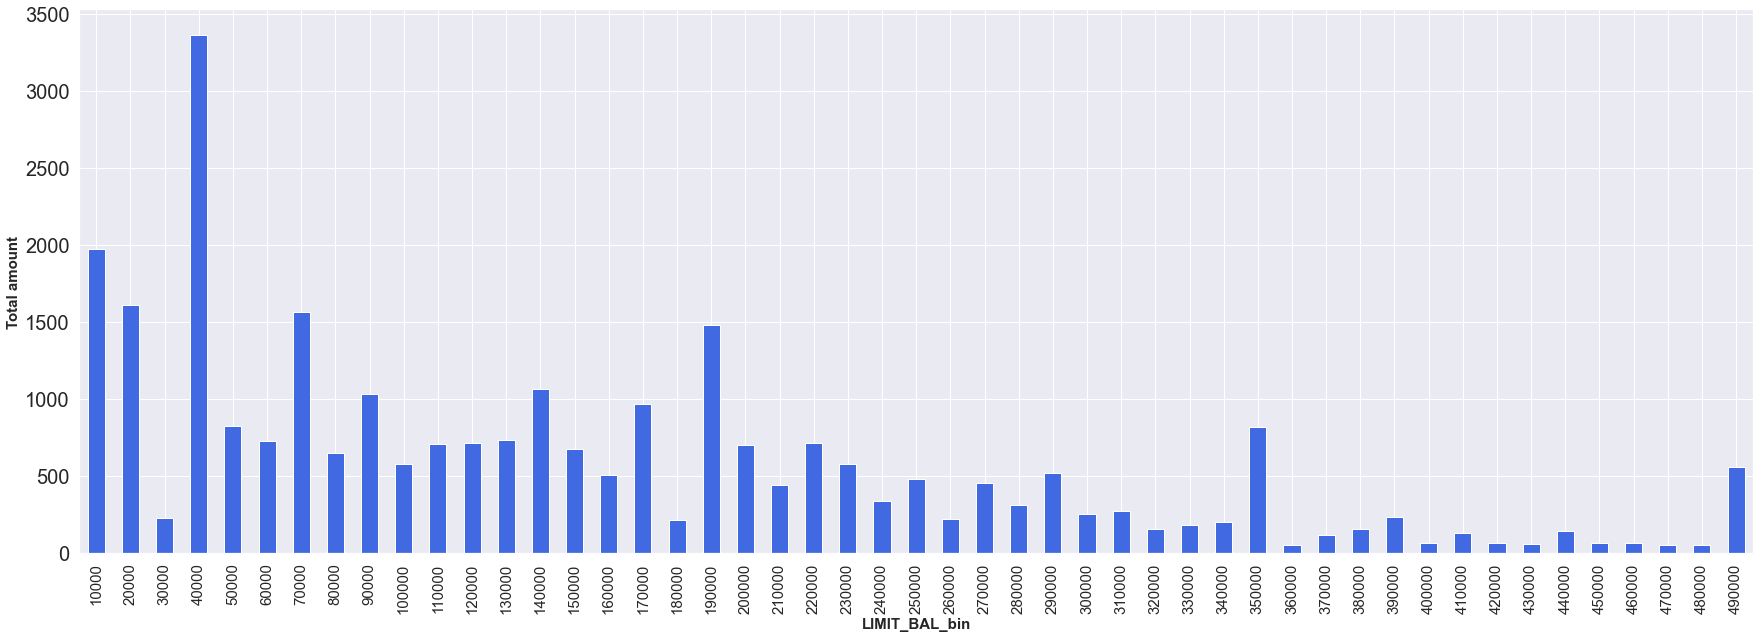

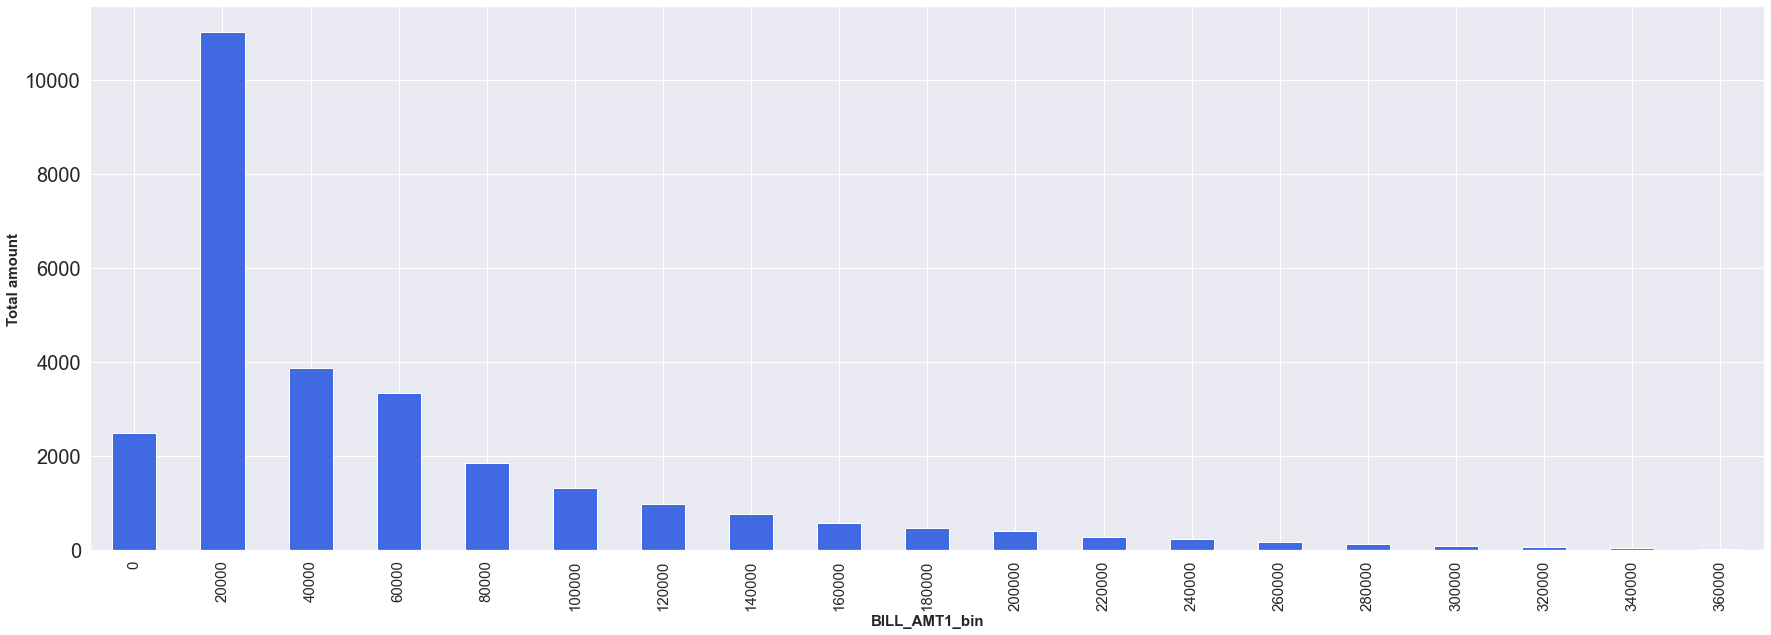

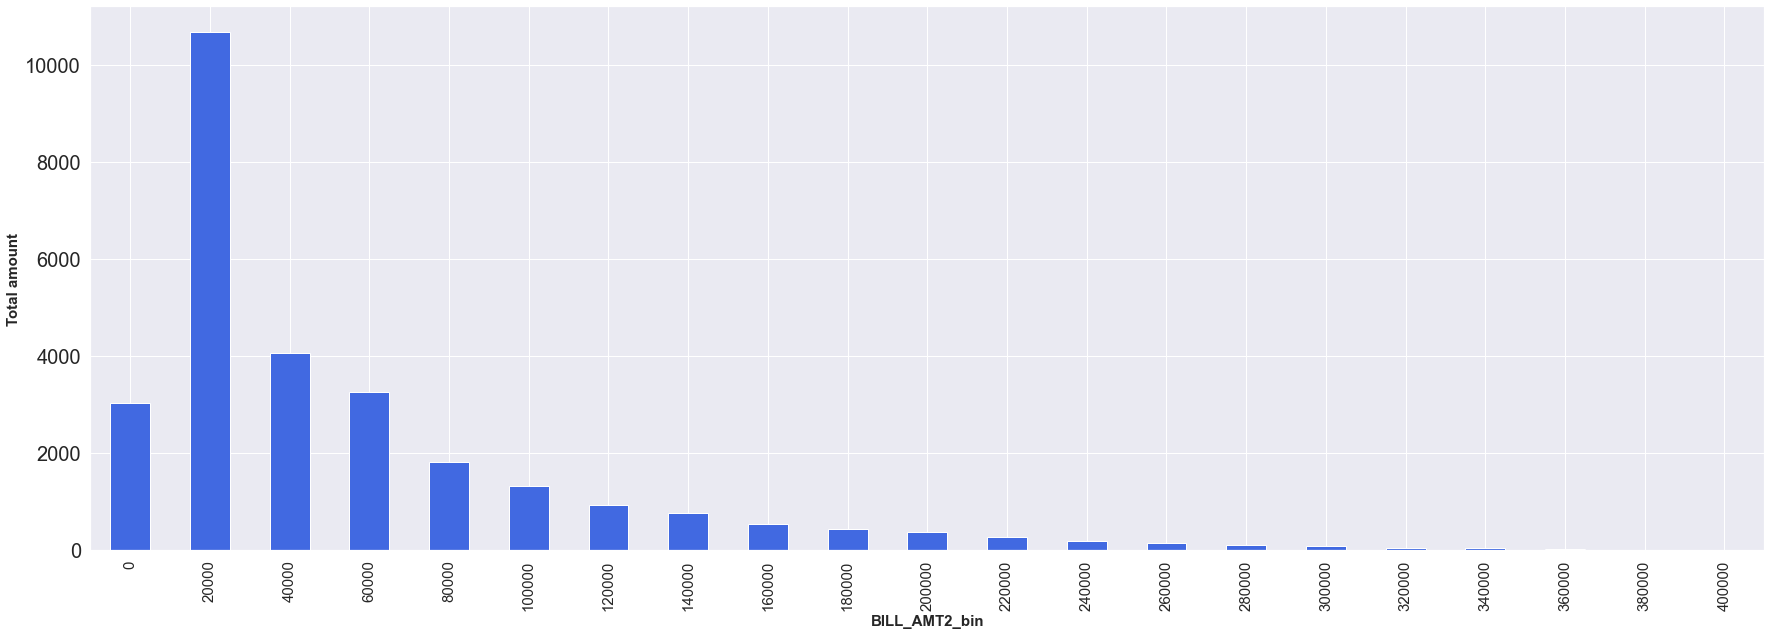

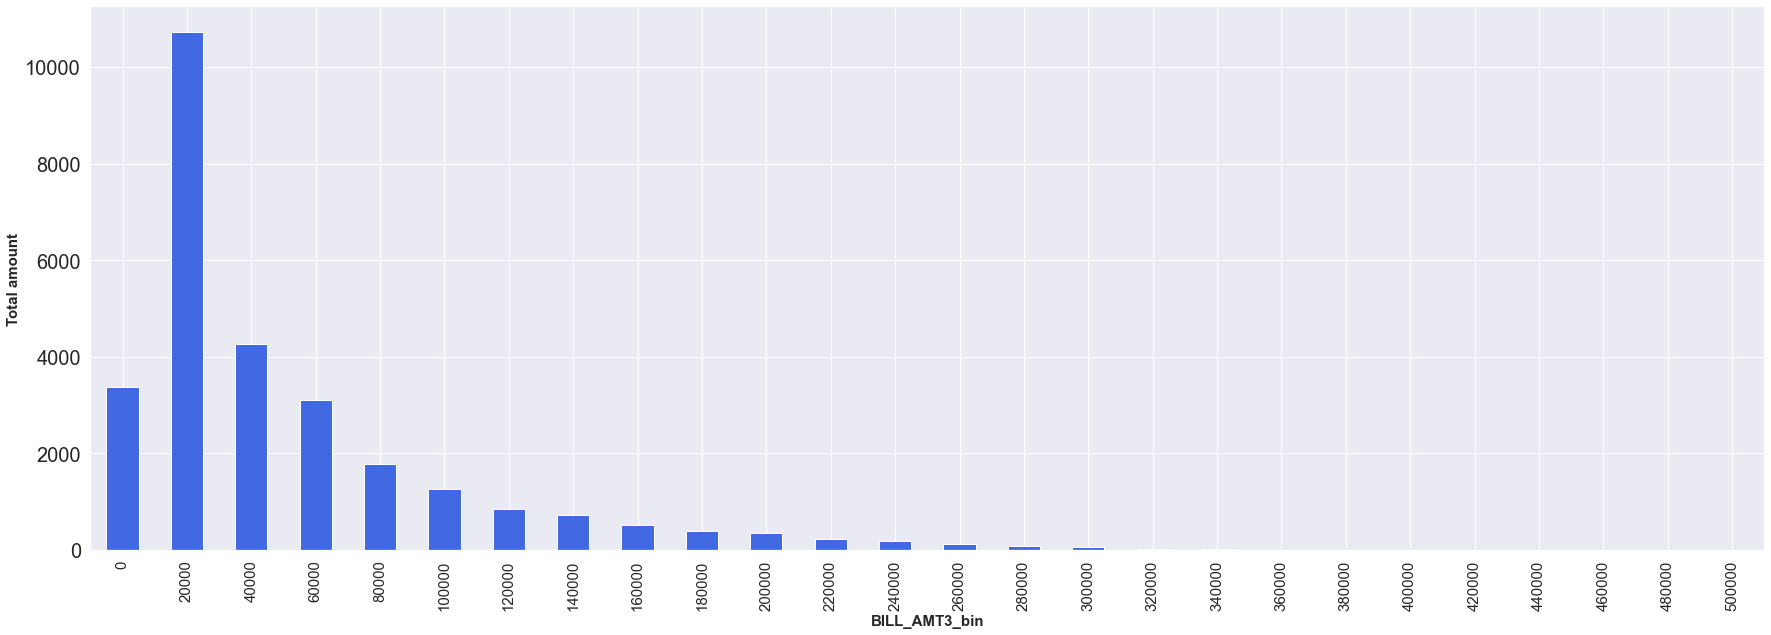

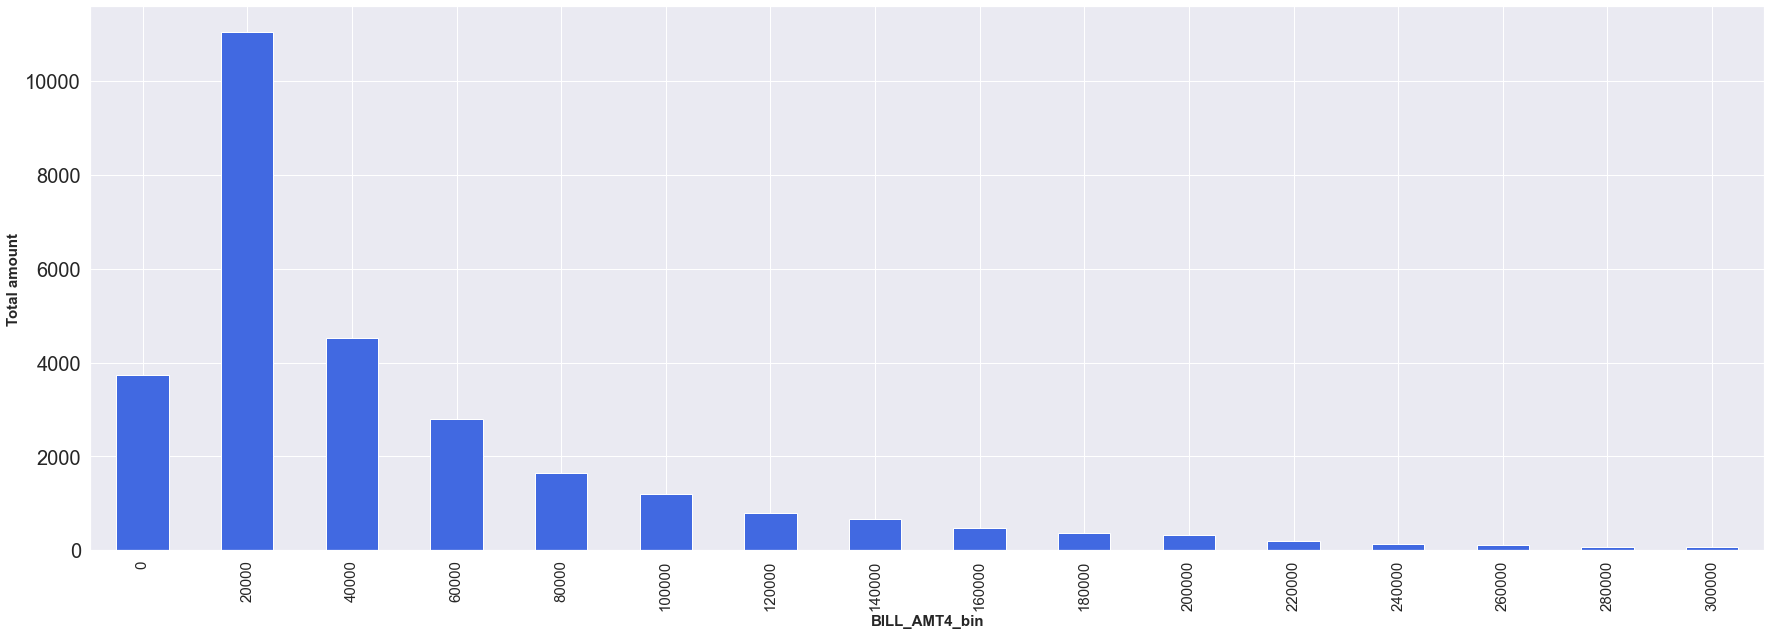

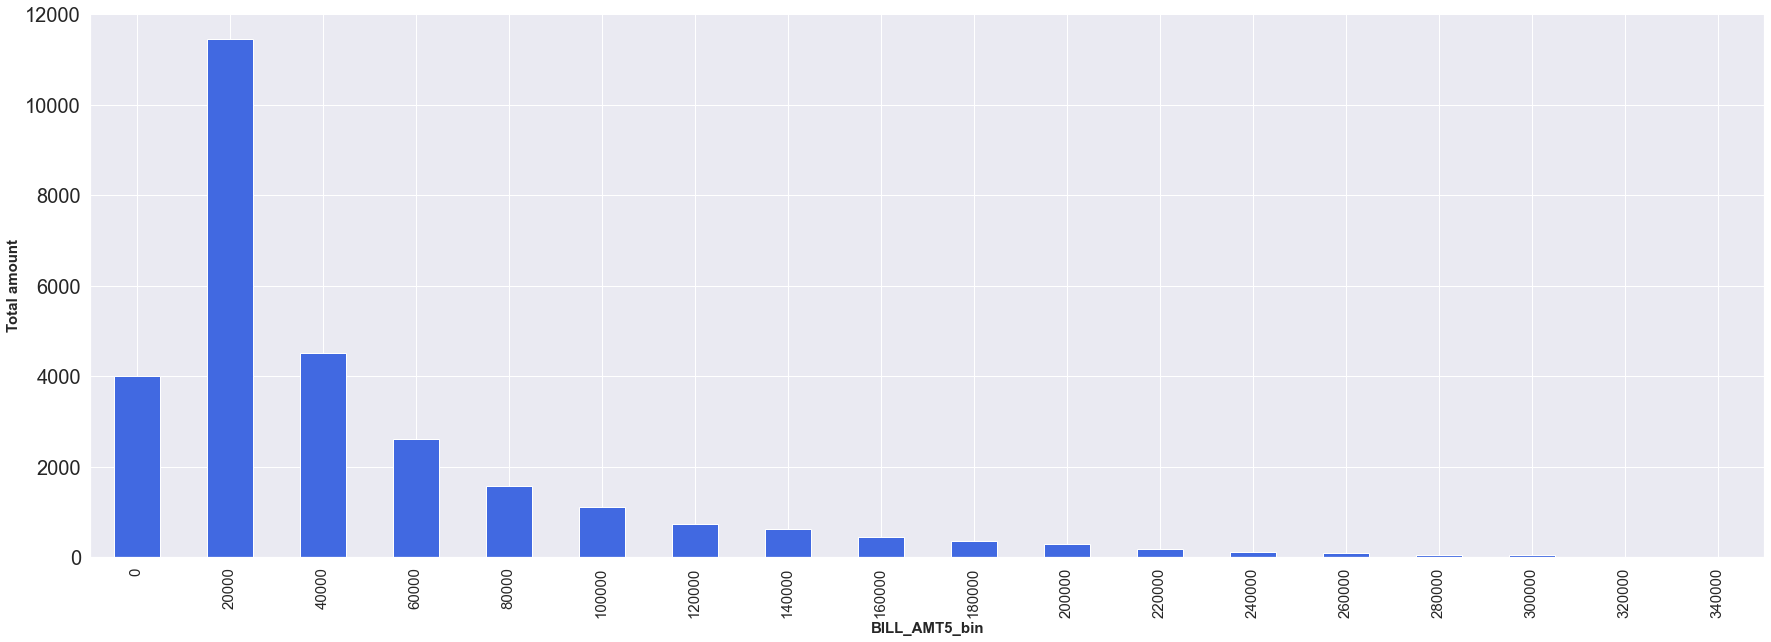

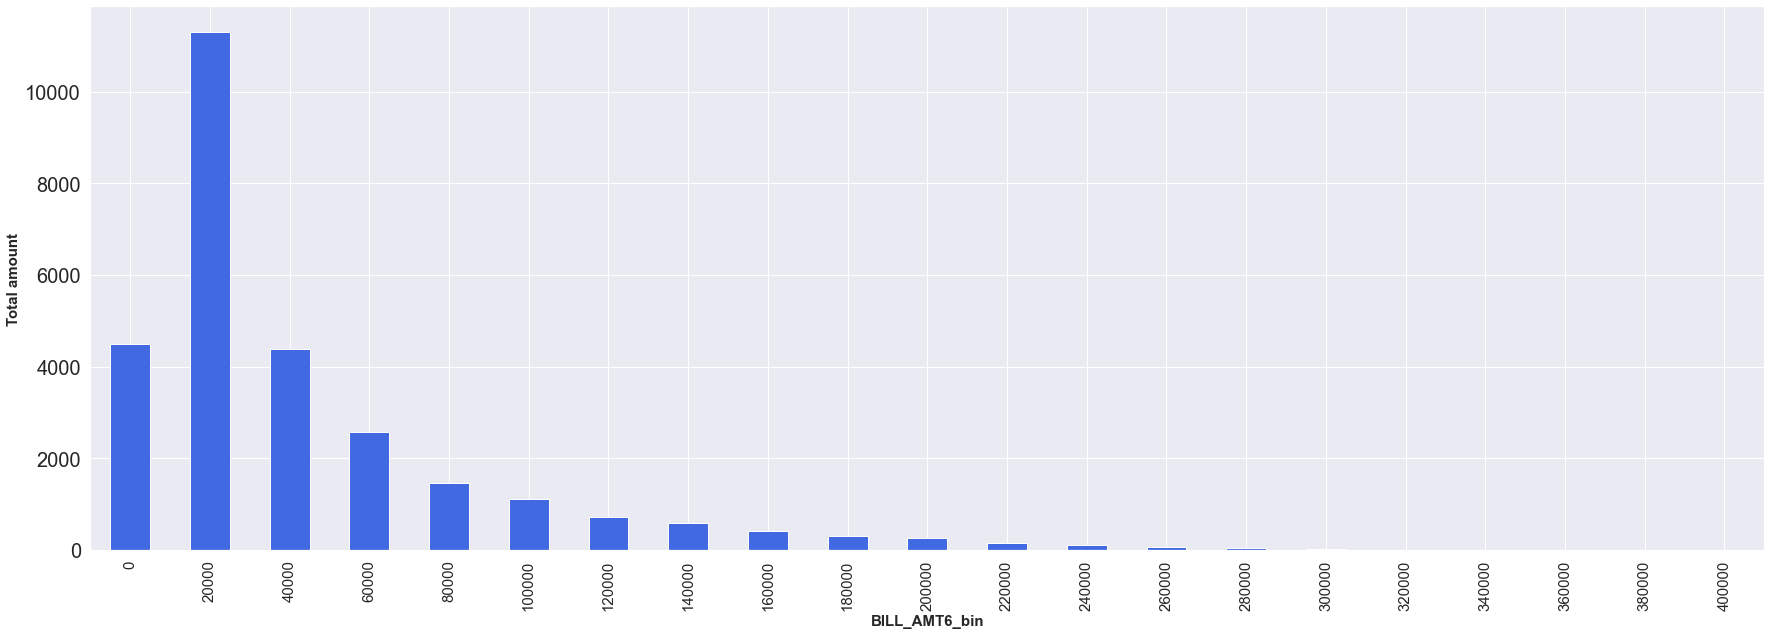

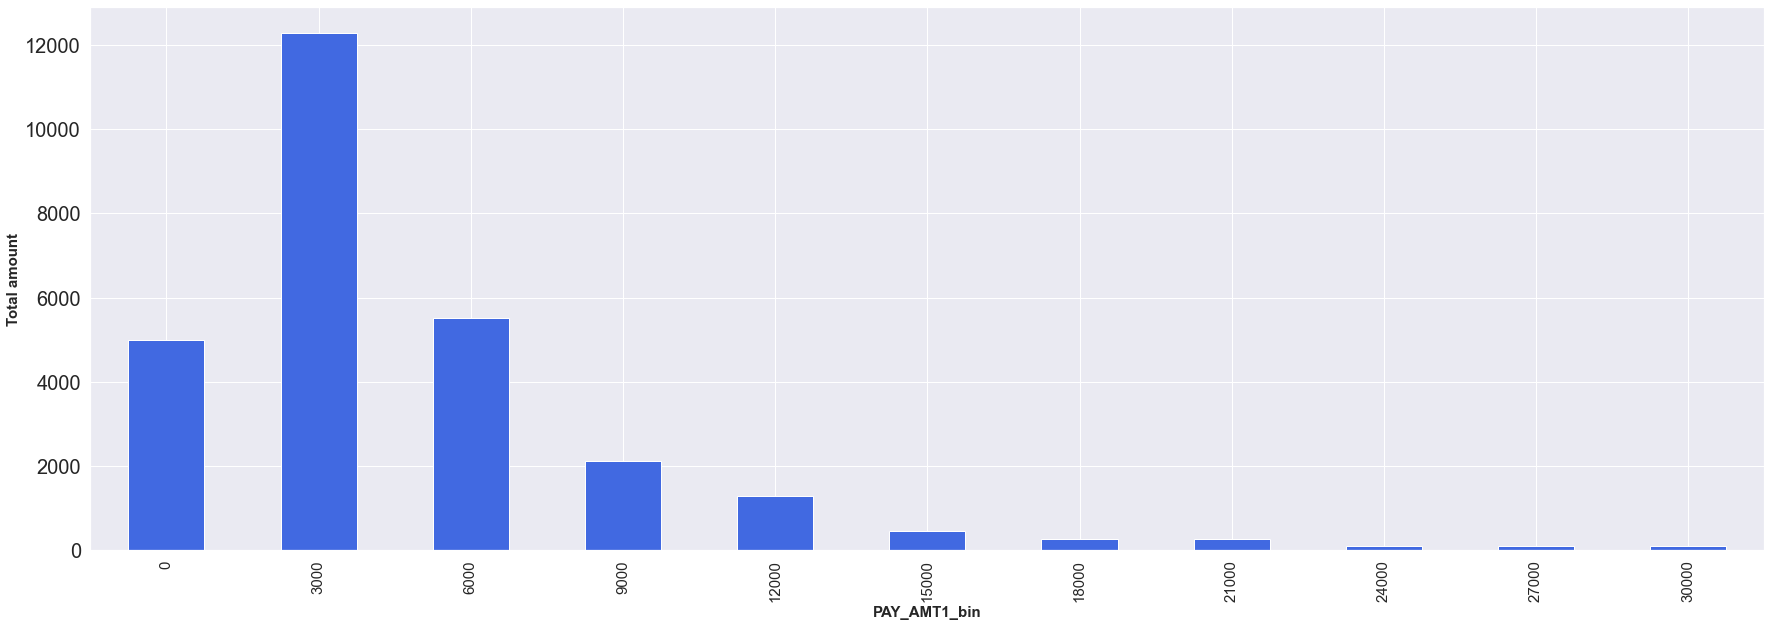

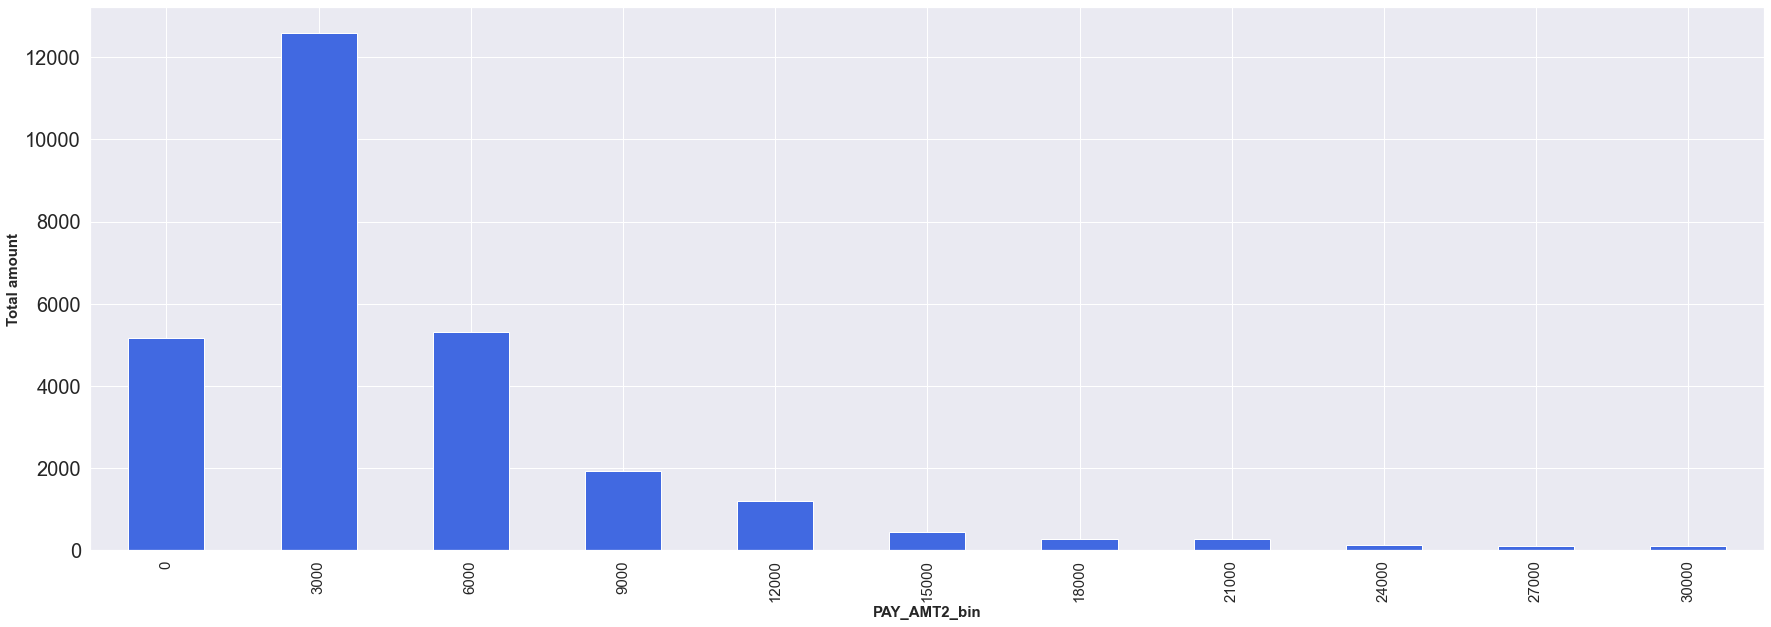

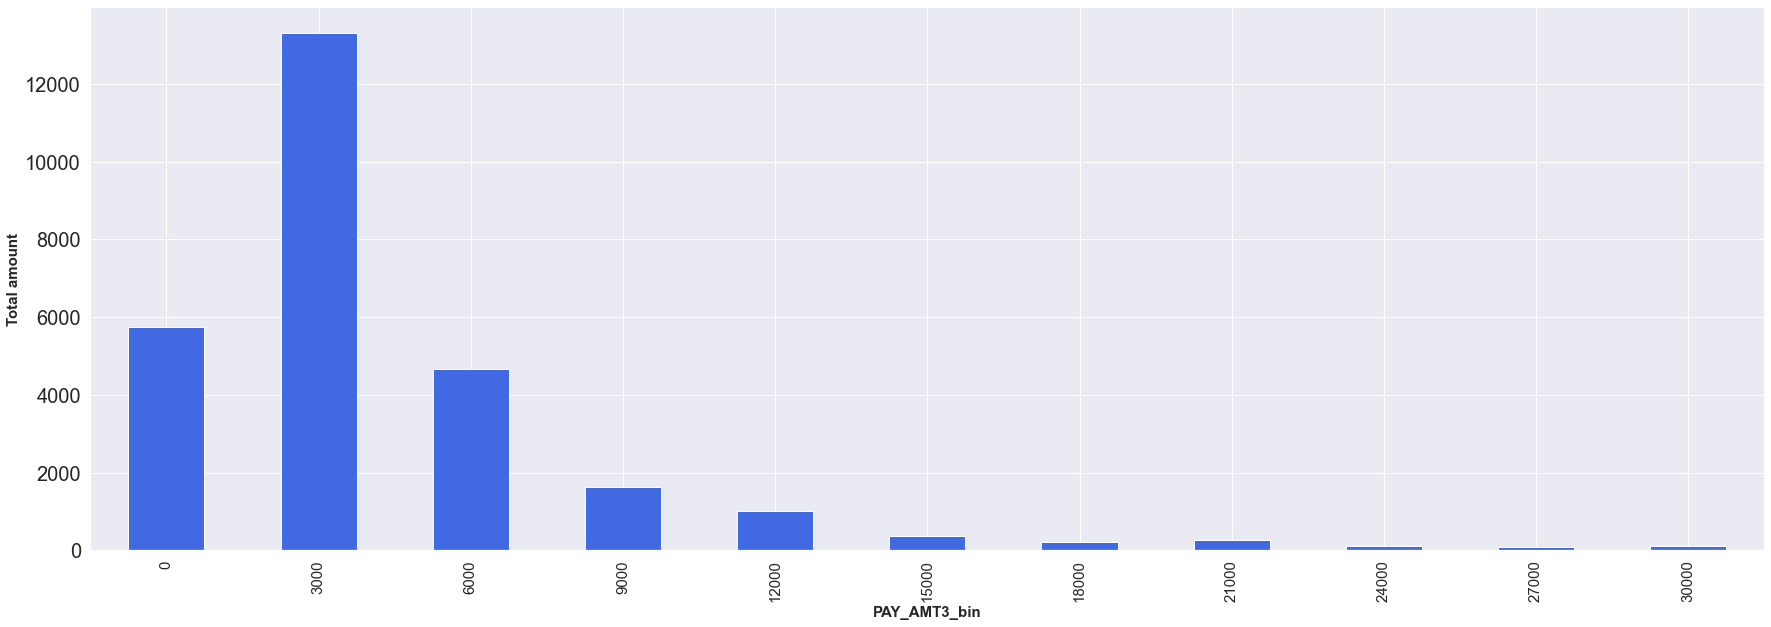

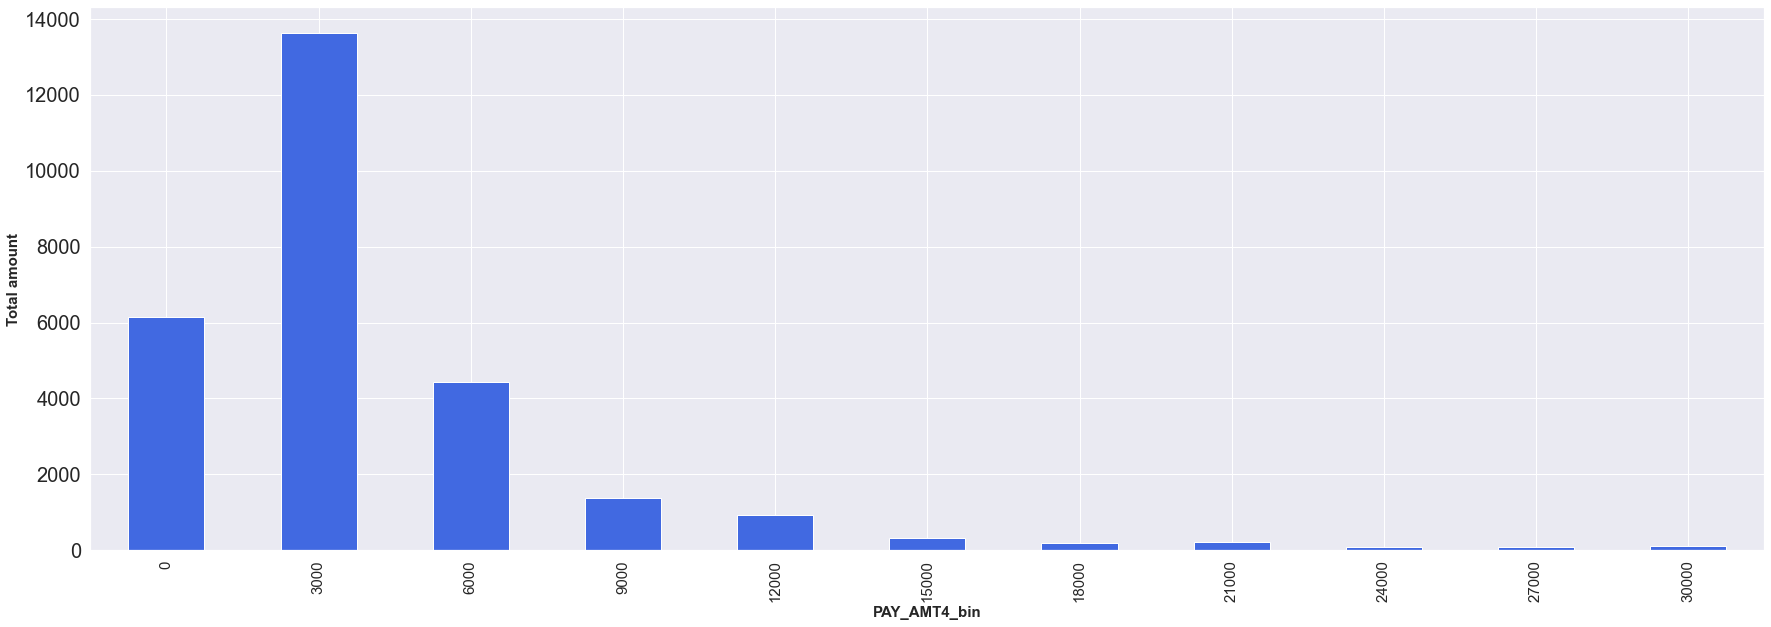

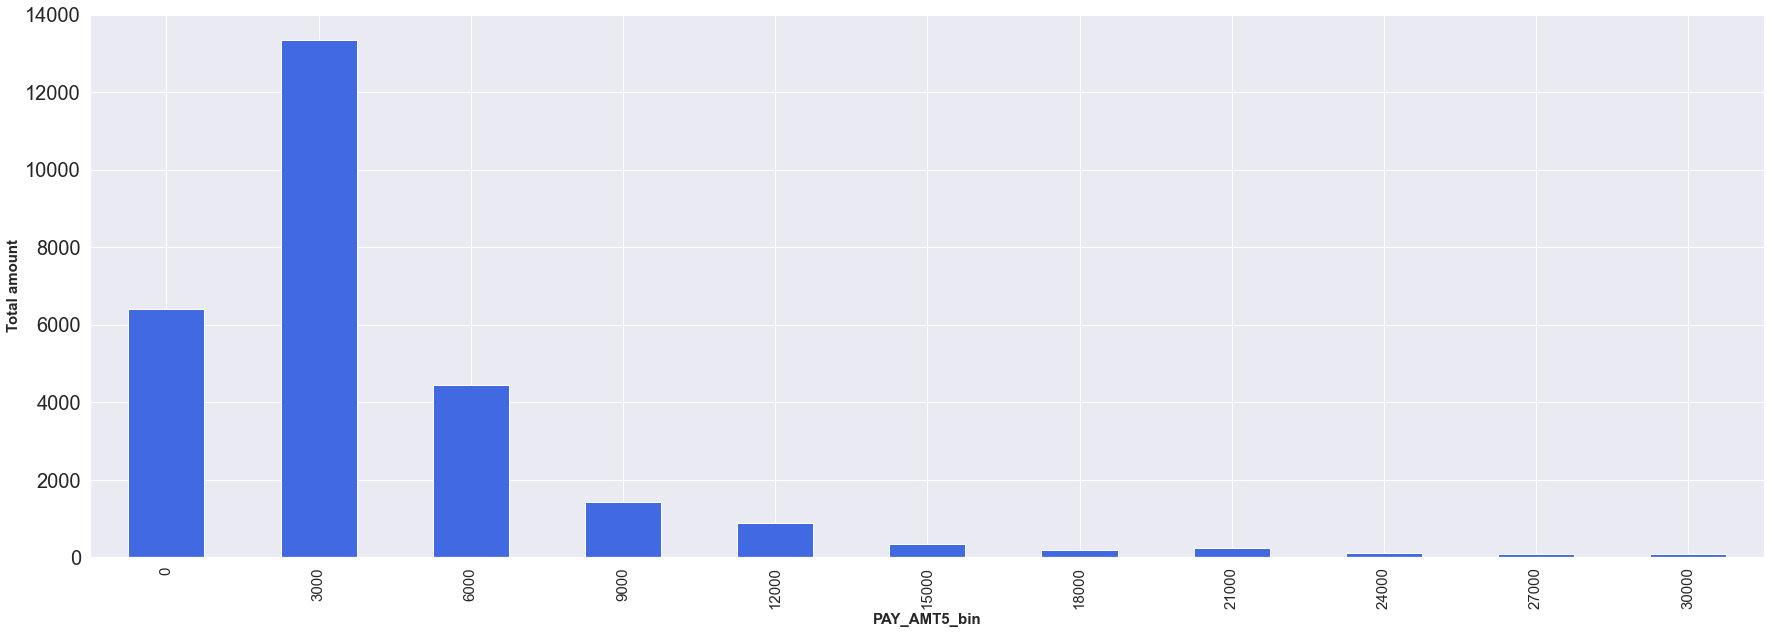

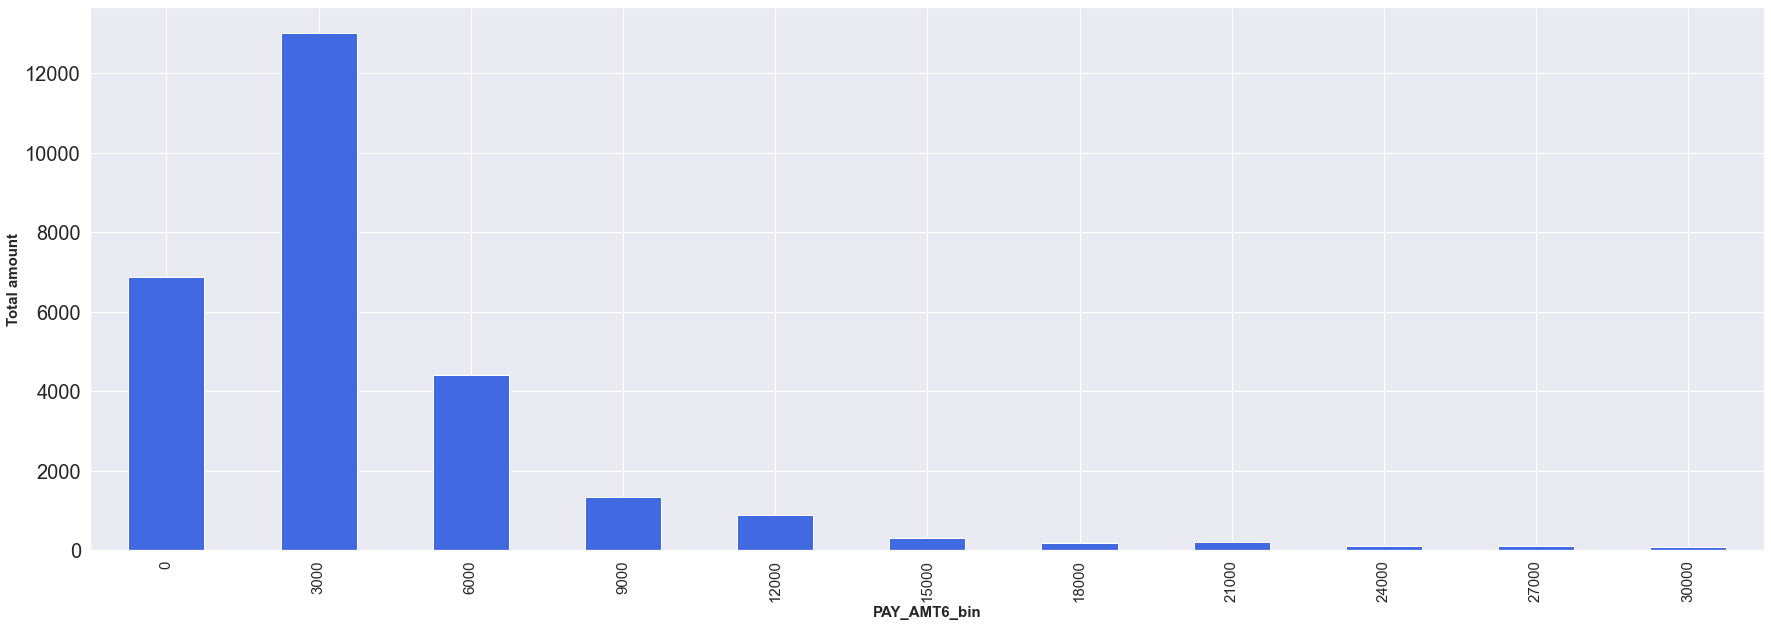

In [39]:
# Visualising Bins
for variable in df.columns:
    if "bin" in variable:
        distribution(variable,df)
        plt.gcf().set_size_inches(30, 10)

In [40]:
df.shape

(28102, 39)

In [41]:
# Drop continous variables for which bins are already created
df.drop(['ID','AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
         'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1,inplace=True)

In [42]:
df.shape

(28102, 24)

In [43]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'default_payment', 'Age_bin', 'LIMIT_BAL_bin',
       'BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin',
       'BILL_AMT5_bin', 'BILL_AMT6_bin', 'PAY_AMT1_bin', 'PAY_AMT2_bin',
       'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin'],
      dtype='object')

In [44]:
df.head()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment,Age_bin,LIMIT_BAL_bin,BILL_AMT1_bin,BILL_AMT2_bin,BILL_AMT3_bin,BILL_AMT4_bin,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,2,2,1,2,2,-1,-1,-2,-2,1,"(20, 30]",10000,20000,20000,20000,0,0,0,0,3000,0,0,0,0
1,2,2,2,-1,2,0,0,0,2,1,"(20, 30]",110000,20000,20000,20000,20000,20000,20000,0,3000,3000,3000,0,3000
2,2,2,2,0,0,0,0,0,0,0,"(30, 40]",80000,40000,20000,20000,20000,20000,20000,3000,3000,3000,3000,3000,6000
3,2,2,1,0,0,0,0,0,0,0,"(30, 40]",40000,60000,60000,60000,40000,40000,40000,3000,3000,3000,3000,3000,3000
4,1,2,1,-1,0,-1,0,0,0,0,"(50, 60]",40000,20000,20000,40000,40000,20000,20000,3000,NaN,12000,9000,3000,3000


### One-Hot Encoding

In [45]:
#one hot encoding
dummy = list(df.columns)
dummy.remove('default_payment')

df = pd.get_dummies(data=df,columns=dummy,drop_first=True)
# df['default_payment'] = df['default_payment'].replace(['no'],0)
# df['default_payment'] = df['default_payment'].replace(['yes'],1)

In [46]:
df.shape

(28102, 292)

#### Remove columns with low event rate

In [47]:
#removing columns with very low event rate
a = [col for col, val in df.sum().iteritems() if val < 200 and val > 0]
display(a)
df.drop(a, axis=1, inplace=True)

['PAY_1_4',
 'PAY_1_5',
 'PAY_1_6',
 'PAY_1_7',
 'PAY_1_8',
 'PAY_2_1',
 'PAY_2_4',
 'PAY_2_5',
 'PAY_2_6',
 'PAY_2_7',
 'PAY_2_8',
 'PAY_3_1',
 'PAY_3_4',
 'PAY_3_5',
 'PAY_3_6',
 'PAY_3_7',
 'PAY_3_8',
 'PAY_4_1',
 'PAY_4_3',
 'PAY_4_4',
 'PAY_4_5',
 'PAY_4_6',
 'PAY_4_7',
 'PAY_4_8',
 'PAY_5_3',
 'PAY_5_4',
 'PAY_5_5',
 'PAY_5_6',
 'PAY_5_7',
 'PAY_5_8',
 'PAY_6_3',
 'PAY_6_4',
 'PAY_6_5',
 'PAY_6_6',
 'PAY_6_7',
 'PAY_6_8',
 'LIMIT_BAL_bin_320000',
 'LIMIT_BAL_bin_330000',
 'LIMIT_BAL_bin_340000',
 'LIMIT_BAL_bin_360000',
 'LIMIT_BAL_bin_370000',
 'LIMIT_BAL_bin_380000',
 'LIMIT_BAL_bin_400000',
 'LIMIT_BAL_bin_410000',
 'LIMIT_BAL_bin_420000',
 'LIMIT_BAL_bin_430000',
 'LIMIT_BAL_bin_440000',
 'LIMIT_BAL_bin_450000',
 'LIMIT_BAL_bin_460000',
 'LIMIT_BAL_bin_470000',
 'LIMIT_BAL_bin_480000',
 'BILL_AMT1_bin_260000',
 'BILL_AMT1_bin_280000',
 'BILL_AMT1_bin_300000',
 'BILL_AMT1_bin_320000',
 'BILL_AMT1_bin_340000',
 'BILL_AMT1_bin_360000',
 'BILL_AMT2_bin_240000',
 'BILL_AMT2_bin_26

In [48]:
df.shape

(28102, 176)

### Data Modelling - LOGISTIC REGRESSION

In [49]:
# Split the data into train and test datasets
df_model=df.copy()
Y = df_model.pop('default_payment')
X = df_model
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, stratify=Y)

In [50]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)

LogisticRegression()

#### Prediction probabilities on test dataset

In [51]:
y_test_pred = lr_model.predict_proba(X_test)
y_test_pred = np.round(y_test_pred, 4)
y_test_pred_final = pd.DataFrame({'default_payment':Y_test,'default_payment_Prob':y_test_pred[:,1]})
y_test_pred_final.head()

,default_payment,default_payment_Prob
24445,1,0.1746
28154,0,0.1205
9741,0,0.2078
14607,0,0.1466
26692,1,0.0937


#### Percentiles are created to decide on the cut-off probability

In [52]:
#Creating percentiles
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.default_payment_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head(5)

,default_payment,default_payment_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
24445,1,0.1746,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28154,0,0.1205,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9741,0,0.2078,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14607,0,0.1466,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26692,1,0.0937,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Performance Metrics are calculated on various probability cut-offs

In [53]:
# Now let's calculate performance metrices for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['probablity','accuracy','recall',
                                    'flagged rate'])
for i in numbers:
    cm1      = metrics.confusion_matrix(y_test_pred_final.default_payment, y_test_pred_final[i] )
    total    = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    recall   = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    predf    = (cm1[1,1]+cm1[0,1])/total
    cutoff_df.loc[i] =[i,accuracy,recall,predf]
cutoff_df = cutoff_df.round(3)
cutoff_df.head(30)

,probablity,accuracy,recall,flagged rate
0.00,0.00,0.222,1.000,1.000
0.01,0.01,0.222,1.000,1.000
0.02,0.02,0.224,0.999,0.998
0.03,0.03,0.229,0.998,0.992
0.04,0.04,0.239,0.996,0.981
0.05,0.05,0.255,0.993,0.964
0.06,0.06,0.279,0.990,0.938
0.07,0.07,0.307,0.977,0.905
0.08,0.08,0.337,0.959,0.867
0.09,0.09,0.371,0.939,0.824


#### Performance Metrics Plot on different probabilities

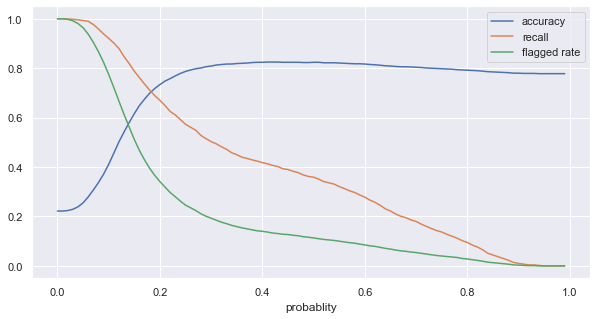

In [54]:
# Let's plot performance metrics for various probabilities.
cutoff_df.plot.line(x='probablity', y=['accuracy','recall', 'flagged rate'])
plt.gcf().set_size_inches(10, 5)
#plt.show()

#### Cut-off probabilities for 30% flagging rate

In [55]:
cutoff_prob_30pct = abs(cutoff_df['flagged rate'] - .3).idxmin()
print('cutoff_prob_30pct ~ ',cutoff_prob_30pct)

cutoff_prob_30pct ~  0.22


In [56]:
#We want a good balance keeping flagged rate/false positive rate low and recall high.
y_test_pred_final['final_predicted'] = y_test_pred_final.default_payment_Prob.map( lambda x: 1 if x > 0.22 else 0)
print('Cutoff probablity for 30% flagging: 0.22')
performance_metrics(y_test_pred_final.default_payment,y_test_pred_final.final_predicted)

Cutoff probablity for 30% flagging: 0.22
Confusion Matrix :  
 [[1169 1337]
 [ 702 5223]]
Accuracy :  0.758
Recall :  0.625
Flagged percentage : 0.297


()

### Model Evaluation

Model is tuned in such a way that the default capture rate is high and incorrect flagging of defaults is low.

On flagging 30% of the credit card users for default, our model is able to correctly predict 62% of actual defaults

### Data Modeling - RANDOM FOREST CLASSIFICATION
Many of the plots and model fitting was inspired from the resource from sklearn or from the internet

In [7]:
df_rf.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


Removing first ID and Age-bin column from the dataframe

In [58]:
df_rf1=  df_rf.iloc[: , 1:25]

In [59]:
df_rf1.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


In [60]:
X = df_rf1.loc[:,'LIMIT_BAL':'PAY_AMT6']
y = df_rf1['default_payment']

In [61]:
X.shape

(30000, 23)

#### One-hot-encoding of categorical columns

In [62]:
# This method of onehot encoding is directly used from the internet. However, I could not find the exact resource which I used.
# Because of that reason I am not able to cite it.

from sklearn.preprocessing import OneHotEncoder

cat = list(X.select_dtypes('object').columns)
numb = list(X.select_dtypes('int64').columns)

def encoder(cat, numb):

    enc1 = OneHotEncoder(sparse=False, drop='first')
    cat_matrix =  enc1.fit_transform(X.loc[:, cat])
    X_1hot = pd.DataFrame(cat_matrix,
                         columns=enc1.get_feature_names(cat),
                         index=X.index) 
    
    return pd.concat([X.loc[:, numb],  X_1hot], axis=1)

In [63]:
X1 = encoder(cat, numb)

In [64]:
X1.shape

(30000, 23)

#### Splitting the datset into train , test and validation set

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

#### Scaling the data ( z= (x-u)/s ). where u and s are mean and standard deviation

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [67]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [68]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)


RandomForestClassifier()

Plotting the variable importance plot before and after variable selection

<AxesSubplot:>

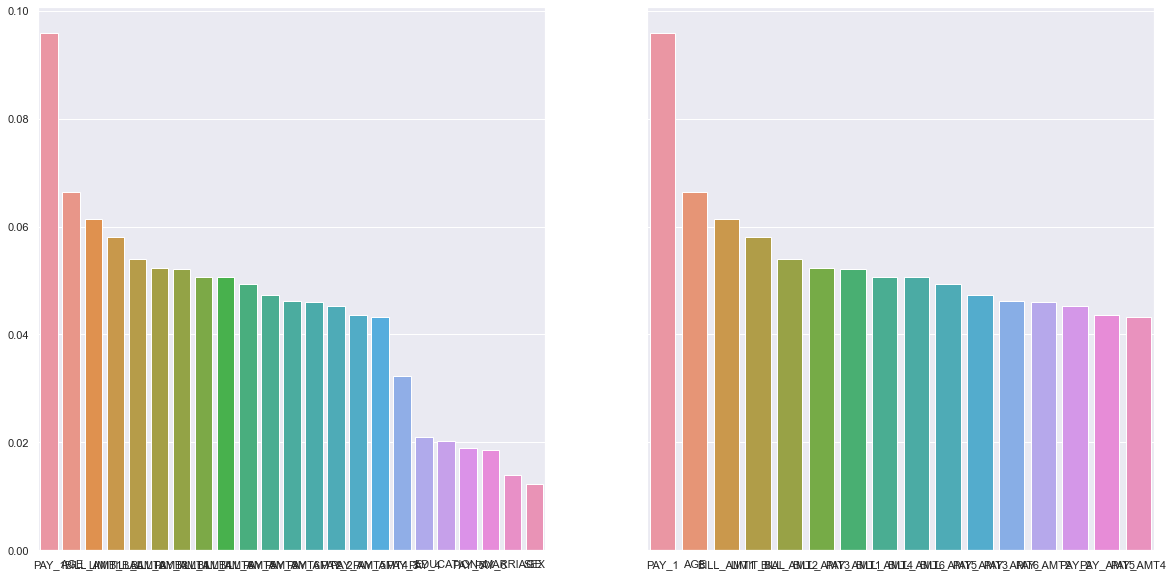

In [69]:
sorted_idx =  rfc.feature_importances_.argsort()[::-1]
sorted_idx
sns.set(rc={"figure.figsize":(20, 10)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.barplot(x=X.columns[sorted_idx], y= rfc.feature_importances_[sorted_idx], capsize=.1,ax=ax1)
sns.barplot(x=X.columns[sorted_idx][:-7], y= rfc.feature_importances_[sorted_idx][:-7], capsize=.1,ax=ax2)


[Text(0, 0, 'PAY_1'),
 Text(1, 0, 'AGE'),
 Text(2, 0, 'BILL_AMT1'),
 Text(3, 0, 'LIMIT_BAL'),
 Text(4, 0, 'BILL_AMT2'),
 Text(5, 0, 'BILL_AMT3'),
 Text(6, 0, 'PAY_AMT1'),
 Text(7, 0, 'BILL_AMT4'),
 Text(8, 0, 'BILL_AMT6'),
 Text(9, 0, 'BILL_AMT5'),
 Text(10, 0, 'PAY_AMT3'),
 Text(11, 0, 'PAY_AMT6'),
 Text(12, 0, 'PAY_AMT2'),
 Text(13, 0, 'PAY_2'),
 Text(14, 0, 'PAY_AMT5'),
 Text(15, 0, 'PAY_AMT4'),
 Text(16, 0, 'PAY_3'),
 Text(17, 0, 'PAY_4'),
 Text(18, 0, 'EDUCATION'),
 Text(19, 0, 'PAY_5'),
 Text(20, 0, 'PAY_6'),
 Text(21, 0, 'MARRIAGE'),
 Text(22, 0, 'SEX')]

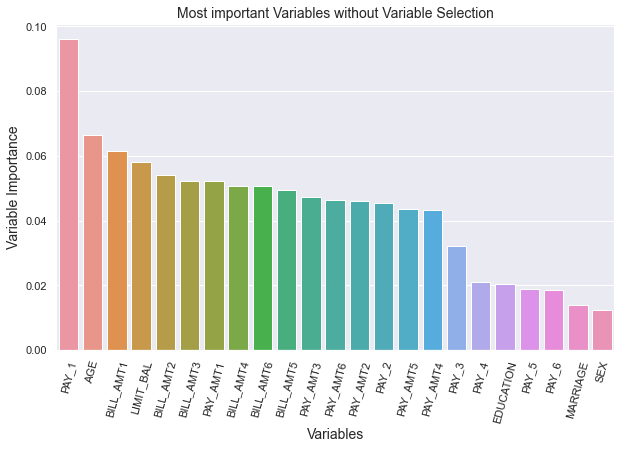

In [70]:
# plotting variable importance 
sns.set(rc={"figure.figsize":(10, 6)})
plot=sns.barplot(x=X.columns[sorted_idx], y= rfc.feature_importances_[sorted_idx], capsize=.1)
plot.set_title("Most important Variables without Variable Selection", fontsize=14)
plot.set_xlabel("Variables", fontsize=14)
plot.set_ylabel("Variable Importance", fontsize=14)
plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
# s.figure.savefig("fig1.png") 

#### Calculating variables selection using recursive feature elimination for mean decrease in impurity (MDI) based variable importance

In [71]:
# calculating feature selection using recursive feature elimination
from sklearn.feature_selection import RFECV
rfe = RFECV(rfc,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train_scaled,y_train)

RFECV(cv=5, estimator=RandomForestClassifier(),
      scoring='neg_mean_squared_error')

### Selecting the most important features using RFECV

In [72]:
select_features= np.array(X.columns)[rfe.get_support()]
print(select_features)

['LIMIT_BAL' 'AGE' 'PAY_1' 'PAY_2' 'PAY_3' 'BILL_AMT1' 'BILL_AMT2'
 'BILL_AMT3' 'BILL_AMT4' 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2'
 'PAY_AMT3' 'PAY_AMT4' 'PAY_AMT5' 'PAY_AMT6']


We found that 7 of the variables that have the least variable importance were eliminated using recursive feature elimination. We updated the train test and validation dataset after variable selection

In [73]:
# Updated dataframe
X_up_train= X_train.iloc[:, np.argsort(rfc.feature_importances_,)[7:]]
X_up_test= X_test.iloc[:, np.argsort(rfc.feature_importances_,)[7:]]
X_up_val= X_val.iloc[:, np.argsort(rfc.feature_importances_,)[7:]]
X_up_train.shape

(18000, 16)

[Text(0, 0, 'PAY_1'),
 Text(1, 0, 'AGE'),
 Text(2, 0, 'BILL_AMT1'),
 Text(3, 0, 'LIMIT_BAL'),
 Text(4, 0, 'BILL_AMT2'),
 Text(5, 0, 'BILL_AMT3'),
 Text(6, 0, 'PAY_AMT1'),
 Text(7, 0, 'BILL_AMT4'),
 Text(8, 0, 'BILL_AMT6'),
 Text(9, 0, 'BILL_AMT5'),
 Text(10, 0, 'PAY_AMT3'),
 Text(11, 0, 'PAY_AMT6'),
 Text(12, 0, 'PAY_AMT2'),
 Text(13, 0, 'PAY_2'),
 Text(14, 0, 'PAY_AMT5'),
 Text(15, 0, 'PAY_AMT4')]

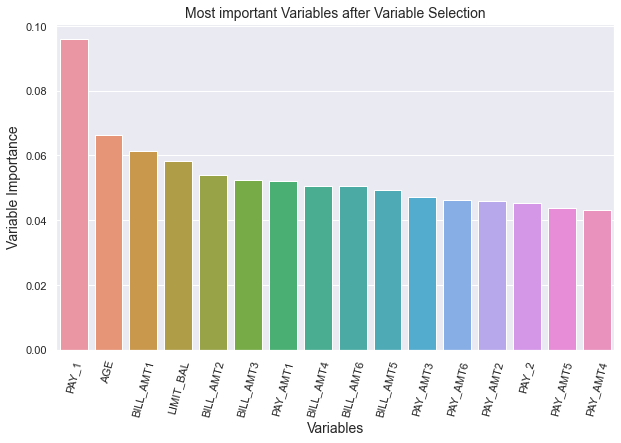

In [74]:
# plotting the most important variables ( after excluding 7 leat important variables from )
sns.set(rc={"figure.figsize":(10, 6)})
plot=sns.barplot(x=X.columns[sorted_idx][:-7], y= rfc.feature_importances_[sorted_idx][:-7], capsize=.1)
plot.set_title("Most important Variables after Variable Selection", fontsize=14)
plot.set_xlabel("Variables", fontsize=14)
plot.set_ylabel("Variable Importance", fontsize=14)
plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
# plot.figure.savefig("fig2.png") 

In [75]:
# scaling the datset after variable selection
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_up_train)
X_va_scaled = scaler.fit_transform(X_up_val)
X_te_scaled = scaler.fit_transform(X_up_test)
# print(X_t_scaled)
X_tr_scaled.shape

(18000, 16)

In [76]:
# training the model with the original X data with all the variables
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=0)

rf_clf.fit(X_train_scaled,y_train)

y_pred=rf_clf.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [77]:
from sklearn import metrics
print(" Test accuracy for baseline RF model:",metrics.accuracy_score(y_test, y_pred))

 Test accuracy for baseline RF model: 0.8226666666666667


In [78]:
# training the model with the updated data after variable selection is done
from sklearn.ensemble import RandomForestClassifier
rf_clf_vr=RandomForestClassifier(random_state=0)
rf_clf_vr.fit(X_tr_scaled,y_train)
y_pred_up=rf_clf_vr.predict(X_te_scaled)
y_pred_up

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [79]:
# updated RF model test accuracy
print(" Test accuracy for updated RF model when 7 variables are removed:",metrics.accuracy_score(y_test, y_pred_up))

 Test accuracy for updated RF model when 7 variables are removed: 0.8261666666666667


In [80]:
# plotting confusion matrix inspired from https
#://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_up)

print(cf_matrix)

[[4501  202]
 [ 841  456]]


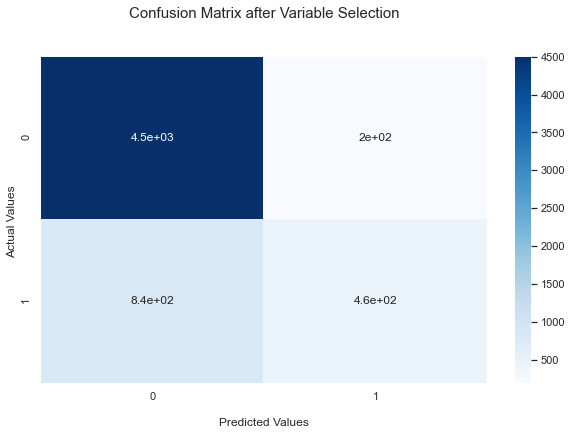

In [81]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix after Variable Selection\n\n', fontsize=15);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [82]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
y_preds_rf = rf_clf_vr.predict(X_te_scaled)
print(classification_report(y_test, y_preds_rf))
print(precision_recall_fscore_support(y_test, y_preds_rf, average='weighted'))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds_rf))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.69      0.35      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.81      0.83      0.80      6000

(0.8102386110222863, 0.8261666666666667, 0.8032866814594343, None)
Confusion Matrix:
[[4501  202]
 [ 841  456]]


In [83]:
# verifying the recall score
from sklearn.metrics import recall_score
recall_score(y_test, y_preds_rf, average='weighted')

0.8261666666666667

### Hyperparameter Tuning using RandomizedSearchCV

In [84]:
## Highly inspired from this https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True, False],
    'max_depth': [4, 6, 10,12,15],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2,4, 8, 10],
    'n_estimators': [50, 100, 150,200]
}
# Create a based model
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = parameters, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tr_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 10, 12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=0, verbose=2)

### Best parameters with randomizedsearchcv 

In [85]:

rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

### Updating the feature selected model with optimized parameters

In [86]:
clf_up_cv=RandomForestClassifier(bootstrap= False, max_depth=4,min_samples_leaf= 5,
 min_samples_split= 8,
 n_estimators= 200, random_state=0)

clf_up_cv.fit(X_tr_scaled,y_train)

y_pred_up_cv=clf_up_cv.predict(X_te_scaled)
y_pred_up_cv

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [87]:
from sklearn import metrics

print(" Test accuracy for updated RF model after hyperparameter tuning:",metrics.accuracy_score(y_test, y_pred_up_cv))

 Test accuracy for updated RF model after hyperparameter tuning: 0.8293333333333334


In [88]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
y_preds_rf_cv = clf_up_cv.predict(X_te_scaled)
print(classification_report(y_test, y_preds_rf_cv))
print(precision_recall_fscore_support(y_test, y_preds_rf_cv, average='weighted'))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix for the updated model after hyperparameter tuning:")
print(confusion_matrix(y_test, y_preds_rf_cv))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4703
           1       0.74      0.33      0.45      1297

    accuracy                           0.83      6000
   macro avg       0.79      0.65      0.68      6000
weighted avg       0.82      0.83      0.80      6000

(0.8172606523720689, 0.8293333333333334, 0.8022829398548723, None)
Confusion Matrix for the updated model after hyperparameter tuning:
[[4554  149]
 [ 875  422]]


In [89]:
# plotting confusion matrix inspired from https
#://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_fin = confusion_matrix(y_test, y_preds_rf_cv)

print(cf_matrix_fin)

[[4554  149]
 [ 875  422]]


### Confusion Matrix for the updated model after hyperparameter tuning

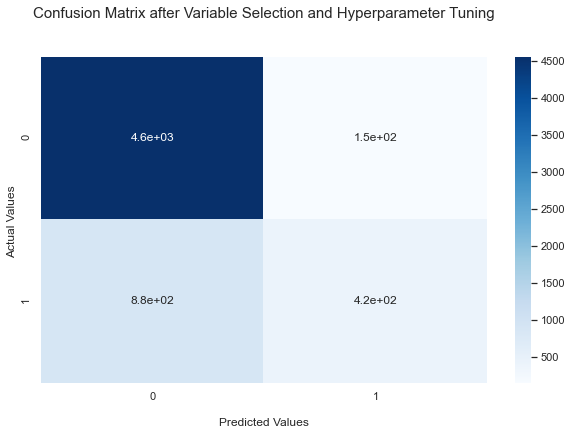

In [90]:
import seaborn as sns

ax = sns.heatmap(cf_matrix_fin, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix after Variable Selection and Hyperparameter Tuning\n\n',fontsize=15);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Model Evaluation

By applying RandomForest model  to our data, we were able to achieve the accuracy and recall rate of 82%. By applying feature selection and hyperparameter tuning, we were able to increase our accuracy and recall to almost 83 %.